In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [3]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.e+-]+)",

        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.e+-]+)",

        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.e+-]+)",

        "Painter_Knapsack_combined_efficiency": r"Painter\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_Painter_Knapsack_Combined_time": r"Final painter\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "Hilbert_SFC_efficiency": r"Hilbert SFC efficiency:\s+([\d.]+)",
        "Final_Hilbert_SFC_time": r"Final Hilbert SFC time:\s+([\d.e+-]+)",

        "Hilbert_painterPartition_efficiency": r"Hilbert\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_Hilbert_Painter_time": r"Final Hilbert\+Painter time:\s+([\d.e+-]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

file_paths = ['../output/run_250/4_4_output_best.txt', '../output/run_250/4_8_output_best.txt', '../output/run_250/4_16_output_best.txt',
              '../output/run_250/8_4_output_best.txt', '../output/run_250/8_8_output_best.txt', '../output/run_250/8_16_output_best.txt',
              '../output/run_250/16_4_output_best.txt', '../output/run_250/16_8_output_best.txt', '../output/run_250/16_16_output_best.txt',
              '../output/run_250/32_4_output_best.txt', '../output/run_250/32_8_output_best.txt', '../output/run_250/32_16_output_best.txt',
              '../output/run_250/64_4_output_best.txt', '../output/run_250/64_8_output_best.txt', '../output/run_250/64_16_output_best.txt',
              '../output/run_250/128_4_output_best.txt', '../output/run_250/128_8_output_best.txt', '../output/run_250/128_16_output_best.txt',
              '../output/run_250/256_4_output_best.txt', '../output/run_250/256_8_output_best.txt', '../output/run_250/256_16_output_best.txt',
              '../output/run_250/512_4_output_best.txt','../output/run_250/512_8_output_best.txt','../output/run_250/512_16_output_best.txt',
              '../output/run_250/1024_4_output_best.txt','../output/run_250/1024_8_output_best.txt','../output/run_250/1024_16_output_best.txt']



result_df = consolidate_data_from_files(file_paths)




In [4]:
result_df

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0      1                  0.999699             0.000086             0.800846   
1      2                  0.999849             0.000063             0.800966   
2      3                  0.999815             0.000060             0.998951   
3      4                  0.999966             0.000087             0.800997   
4      5                  0.999647             0.000088             0.800558   
..   ...                       ...                  ...                  ...   
130    1                  0.999953             0.013898             0.941356   
131    2                  0.999950             0.013812             0.941246   
132    3                  0.999952             0.013521             0.941348   
133    4                  0.999953             0.013320             0.941188   
134    5                  0.999957             0.013659             0.941157   

     Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0          0.000073                         0.998525                0.000055   
1          0.000060                         0.999506                0.000031   
2          0.000055                         0.998951                0.000050   
3          0.000083                         0.998781                0.000037   
4          0.000081                         0.997998                0.000035   
..              ...                              ...                     ...   
130        0.007040                         0.998175                0.061009   
131        0.011109                         0.997694                0.052141   
132        0.009345                         0.998095                0.895956   
133        0.007023                         0.998206                0.054758   
134        0.007027                         0.997989                0.823390   

     Painter_Knapsack_combined_efficiency  \
0                                0.999699   
1                                0.999849   
2                                0.999815   
3                                0.999966   
4                                0.999647   
..                                    ...   
130                              0.999279   
131                              0.999147   
132                              0.999016   
133                              0.999132   
134                              0.999025   

     Final_Painter_Knapsack_Combined_time  SFC_Knapsack_combined_efficiency  \
0                                0.000060                          0.999699   
1                                0.000047                          0.999849   
2                                0.000067                          0.999815   
3                                0.000065                          0.999966   
4                                0.000067                          0.999647   
..                                    ...                               ...   
130                              0.847626                          0.941592   
131                              0.055332                          0.941615   
132                              0.838532                          0.941463   
133                              0.055852                          0.941385   
134                              0.791253                          0.941525   

     Final_SFC_Knapsack_Combined_time  Hilbert_SFC_efficiency  \
0                            0.000053                1.000000   
1                            0.000041                1.000000   
2                            0.000058                1.000000   
3                            0.000056                1.000000   
4                            0.000060                1.000000   
..                                ...                     ...   
130                          0.006675                0.984777   
131                          0.005438                0.984812   
132     

In [5]:
result_df.head(10)

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0    1                  0.999699             0.000086             0.800846   
1    2                  0.999849             0.000063             0.800966   
2    3                  0.999815             0.000060             0.998951   
3    4                  0.999966             0.000087             0.800997   
4    5                  0.999647             0.000088             0.800558   
5    1                  0.999905             0.000090             0.999598   
6    2                  0.999845             0.000066             0.889341   
7    3                  0.999961             0.000062             0.889281   
8    4                  0.999925             0.000065             0.888796   
9    5                  0.999882             0.000063             0.890323   

   Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0        0.000073                         0.998525                0.000055   
1        0.000060                         0.999506                0.000031   
2        0.000055                         0.998951                0.000050   
3        0.000083                         0.998781                0.000037   
4        0.000081                         0.997998                0.000035   
5        0.000081                         0.999598                0.000098   
6        0.000065                         0.999837                0.000032   
7        0.000060                         0.998971                0.000023   
8        0.000061                         0.999217                0.000026   
9        0.000059                         0.998564                0.000024   

   Painter_Knapsack_combined_efficiency  Final_Painter_Knapsack_Combined_time  \
0                              0.999699                              0.000060   
1                              0.999849                              0.000047   
2                              0.999815                              0.000067   
3                              0.999966                              0.000065   
4                              0.999647                              0.000067   
5                              0.999905                              0.000064   
6                              0.999845                              0.000065   
7                              0.999961                              0.000049   
8                              0.999925                              0.000050   
9                              0.999882                              0.000048   

   SFC_Knapsack_combined_efficiency  Final_SFC_Knapsack_Combined_time  \
0                          0.999699                          0.000053   
1                          0.999849                          0.000041   
2                          0.999815                          0.000058   
3                          0.999966                          0.000056   
4                          0.999647                          0.000060   
5                          0.999905                          0.000057   
6                          0.999845                          0.000044   
7                          0.999961                          0.000041   
8                          0.999925                          0.000043   
9                          0.999882                          0.000041   

   Hilbert_SFC_efficiency  Final_Hilbert_SFC_time  \
0                     1.0                6.122866   
1                     1.0                0.000268   
2                     1.0                0.000371   
3                     1.0                0.000374   
4                     1.0                0.000361   
5                     1.0                6.564056   
6                     1.0                0.000381   
7                     1.0                0.000295   
8                     1.0                0.000295   
9                     1.0                0.000281   

   Hi

In [6]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [7]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [8]:
result_df

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0      1                  0.999699             0.000086             0.800846   
1      2                  0.999849             0.000063             0.800966   
2      3                  0.999815             0.000060             0.998951   
3      4                  0.999966             0.000087             0.800997   
4      5                  0.999647             0.000088             0.800558   
..   ...                       ...                  ...                  ...   
130    1                  0.999953             0.013898             0.941356   
131    2                  0.999950             0.013812             0.941246   
132    3                  0.999952             0.013521             0.941348   
133    4                  0.999953             0.013320             0.941188   
134    5                  0.999957             0.013659             0.941157   

     Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0          0.000073                         0.998525                0.000055   
1          0.000060                         0.999506                0.000031   
2          0.000055                         0.998951                0.000050   
3          0.000083                         0.998781                0.000037   
4          0.000081                         0.997998                0.000035   
..              ...                              ...                     ...   
130        0.007040                         0.998175                0.061009   
131        0.011109                         0.997694                0.052141   
132        0.009345                         0.998095                0.895956   
133        0.007023                         0.998206                0.054758   
134        0.007027                         0.997989                0.823390   

     Painter_Knapsack_combined_efficiency  \
0                                0.999699   
1                                0.999849   
2                                0.999815   
3                                0.999966   
4                                0.999647   
..                                    ...   
130                              0.999279   
131                              0.999147   
132                              0.999016   
133                              0.999132   
134                              0.999025   

     Final_Painter_Knapsack_Combined_time  SFC_Knapsack_combined_efficiency  \
0                                0.000060                          0.999699   
1                                0.000047                          0.999849   
2                                0.000067                          0.999815   
3                                0.000065                          0.999966   
4                                0.000067                          0.999647   
..                                    ...                               ...   
130                              0.847626                          0.941592   
131                              0.055332                          0.941615   
132                              0.838532                          0.941463   
133                              0.055852                          0.941385   
134                              0.791253                          0.941525   

     Final_SFC_Knapsack_Combined_time  Hilbert_SFC_efficiency  \
0                            0.000053                1.000000   
1                            0.000041                1.000000   
2                            0.000058                1.000000   
3                            0.000056                1.000000   
4                            0.000060                1.000000   
..                                ...                     ...   
130                          0.006675                0.984777   
131                          0.005438                0.984812   
132     

In [9]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','Painter_Knapsack_combined_efficiency':'Painter_Knapsack_Combined_Efficiency','Final_Painter_Knapsack_Combined_time':'Painter_Knapsack_Combined_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time', 'Hilbert_SFC_efficiency':'Hilbert_SFC_Efficiency', 'Final_Hilbert_SFC_time':'Hilbert_SFC_Final_Time', 'Hilbert_painterPartition_efficiency':'Hilbert_PainterPartition_Efficiency', 'Final_Hilbert_Painter_time':'Hilbert_PainterPartition_Final_Time'} )

In [10]:
result_df

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
0      1                  0.999699                  0.000086   
1      2                  0.999849                  0.000063   
2      3                  0.999815                  0.000060   
3      4                  0.999966                  0.000087   
4      5                  0.999647                  0.000088   
..   ...                       ...                       ...   
130    1                  0.999953                  0.013898   
131    2                  0.999950                  0.013812   
132    3                  0.999952                  0.013521   
133    4                  0.999953                  0.013320   
134    5                  0.999957                  0.013659   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
0               0.800846             0.000073   
1               0.800966             0.000060   
2               0.998951             0.000055   
3               0.800997             0.000083   
4               0.800558             0.000081   
..                   ...                  ...   
130             0.941356             0.007040   
131             0.941246             0.011109   
132             0.941348             0.009345   
133             0.941188             0.007023   
134             0.941157             0.007027   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
0                           0.998525                         0.000055   
1                           0.999506                         0.000031   
2                           0.998951                         0.000050   
3                           0.998781                         0.000037   
4                           0.997998                         0.000035   
..                               ...                              ...   
130                         0.998175                         0.061009   
131                         0.997694                         0.052141   
132                         0.998095                         0.895956   
133                         0.998206                         0.054758   
134                         0.997989                         0.823390   

     Painter_Knapsack_Combined_Efficiency  \
0                                0.999699   
1                                0.999849   
2                                0.999815   
3                                0.999966   
4                                0.999647   
..                                    ...   
130                              0.999279   
131                              0.999147   
132                              0.999016   
133                              0.999132   
134                              0.999025   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
0                                0.000060                          0.999699   
1                                0.000047                          0.999849   
2                                0.000067                          0.999815   
3                                0.000065                          0.999966   
4                                0.000067                          0.999647   
..                                    ...                               ...   
130                              0.847626                          0.941592   
131                              0.055332                          0.941615   
132                              0.838532                          0.941463   
133                              0.055852                          0.941385   
134                              0.791253                          0.941525   

     SFC_Knapsack_Combined_Final_Time  Hilbert_SFC_Efficiency  \
0                            0.000053                1.000000   
1                            0.000041                1.000000   
2                            0.000058                1.000000   
3                   

In [11]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [12]:
print(column_list)

[0.9996985207, 0.9998494586, 0.9998145386, 0.9999656384, 0.9996470618, 0.9999047086, 0.9998445125, 0.9999605753, 0.9999250036, 0.9998817369, 0.9999916265, 0.9999669066, 0.999978719, 0.9999429855, 0.9999112423, 0.9997595104, 0.9997242928, 0.8026010105, 0.999435348, 0.8023343533, 0.889677417, 0.9996877887, 0.9995693165, 0.9998377177, 0.999649055, 0.9416677787, 0.9998830453, 0.9997236681, 0.9998473813, 0.9417093842, 0.8029071028, 0.9994923282, 0.9988101701, 0.802164877, 0.9992296281, 0.8897492348, 0.889346113, 0.999570087, 0.8894595338, 0.8897552807, 0.94205754, 0.9994096888, 0.9414370251, 0.9998573115, 0.9418162685, 0.8027563631, 0.8019299497, 0.999018449, 0.8020517684, 0.8023265431, 0.8899257546, 0.9992071173, 0.8896644305, 0.8892951963, 0.889988836, 0.9414823153, 0.9417259107, 0.9416609247, 0.9414695033, 0.9417589777, 0.8021508266, 0.8020725559, 0.8020419711, 0.80213361, 0.8028835361, 0.8893498629, 0.889617882, 0.8897068097, 0.889501386, 0.8902039518, 0.941483647, 0.9418195047, 0.94153

In [13]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [14]:
filename = '512_4_Output_Best'
df_1 = result_df[result_df['File'] == filename]

In [15]:
df_1

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
105    1                  0.999716                  0.006107   
106    2                  0.999725                  0.005887   
107    3                  0.999716                  0.005860   
108    4                  0.999738                  0.005872   
109    5                  0.999681                  0.006124   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
105             0.800272             0.003143   
106             0.800097             0.003023   
107             0.800335             0.003055   
108             0.800224             0.003070   
109             0.800376             0.003018   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
105                         0.996745                         0.007694   
106                         0.996086                         0.001257   
107                         0.996467                         0.014919   
108                         0.996590                         0.001097   
109                         0.996843                         0.001282   

     Painter_Knapsack_Combined_Efficiency  \
105                              0.997581   
106                              0.997981   
107                              0.998434   
108                              0.998060   
109                              0.997447   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
105                              0.014568                          0.802119   
106                              0.002440                          0.801660   
107                              0.014297                          0.802736   
108                              0.002639                          0.801834   
109                              0.014262                          0.803074   

     SFC_Knapsack_Combined_Final_Time  Hilbert_SFC_Efficiency  \
105                          0.001864                0.941417   
106                          0.001855                0.941505   
107                          0.001857                0.941343   
108                          0.001846                0.941316   
109                          0.001831                0.941421   

     Hilbert_SFC_Final_Time  Hilbert_PainterPartition_Efficiency  \
105                6.273239                             0.996336   
106                0.003315                             0.994898   
107                0.002487                             0.996643   
108                0.002840                             0.996602   
109                0.002943                             0.996389   

     Hilbert_PainterPartition_Final_Time               File  
105                             0.010006  512_4_Output_Best  
106                             0.001349  512_4_Output_Best  
107                             0.001207  512_4_Output_Best  
108                             0.001391  512_4_Output_Best  
109                             0.001214  512_4_Output_Best

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [18]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_256607/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [19]:
specific_group = grouped.get_group('512_8_Output_Best')
specific_group

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
110    1                  0.999888                  0.009115   
111    2                  0.999889                  0.005964   
112    3                  0.999893                  0.005896   
113    4                  0.999899                  0.005997   
114    5                  0.999886                  0.005883   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
110             0.888964             0.006821   
111             0.889087             0.003160   
112             0.889083             0.003136   
113             0.889318             0.003167   
114             0.889073             0.003059   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
110                         0.997547                         0.004552   
111                         0.997705                         0.056083   
112                         0.996525                         0.004463   
113                         0.997344                         0.059313   
114                         0.997491                         0.004488   

     Painter_Knapsack_Combined_Efficiency  \
110                              0.998793   
111                              0.998746   
112                              0.998643   
113                              0.998760   
114                              0.998480   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
110                              0.050388                          0.889527   
111                              0.005894                          0.889619   
112                              0.050578                          0.889741   
113                              0.005975                          0.889492   
114                              0.005300                          0.889398   

     SFC_Knapsack_Combined_Final_Time  Hilbert_SFC_Efficiency  \
110                          0.002131                0.969824   
111                          0.002096                0.969905   
112                          0.002061                0.969882   
113                          0.002248                0.970435   
114                          0.002041                0.970169   

     Hilbert_SFC_Final_Time  Hilbert_PainterPartition_Efficiency  \
110                6.241872                             0.997283   
111                0.004654                             0.997040   
112                0.004673                             0.997434   
113                0.004378                             0.996793   
114                0.004491                             0.997525   

     Hilbert_PainterPartition_Final_Time               File  
110                             0.041940  512_8_Output_Best  
111                             0.052772  512_8_Output_Best  
112                             0.056564  512_8_Output_Best  
113                             0.004521  512_8_Output_Best  
114                             0.004529  512_8_Output_Best

In [20]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9998907452599999)

In [21]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Painter_Knapsack_Combined_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency',
    'Hilbert_SFC_Efficiency',
    'Hilbert_PainterPartition_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Painter_Knapsack_Combined_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time',
    'Hilbert_SFC_Final_Time',
    'Hilbert_PainterPartition_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_256607/4213024774.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [22]:
grouped

File  Only_Knapsack_Efficiency_mean  \
0       4_4_Output_Best                       0.999795   
1       4_8_Output_Best                       0.999903   
2      4_16_Output_Best                       0.999958   
3       8_4_Output_Best                       0.999620   
4       8_8_Output_Best                       0.999898   
5      8_16_Output_Best                       0.999948   
6      16_4_Output_Best                       0.999742   
7      16_8_Output_Best                       0.999896   
8     16_16_Output_Best                       0.999940   
9      32_4_Output_Best                       0.999748   
10     32_8_Output_Best                       0.999883   
11    32_16_Output_Best                       0.999943   
12     64_4_Output_Best                       0.999728   
13     64_8_Output_Best                       0.999876   
14    64_16_Output_Best                       0.999952   
15    128_4_Output_Best                       0.999735   
16    128_8_Output_Best                       0.999889   
17   128_16_Output_Best                       0.999952   
18    256_4_Output_Best                       0.999728   
19    256_8_Output_Best                       0.999890   
20   256_16_Output_Best                       0.999952   
21    512_4_Output_Best                       0.999715   
22    512_8_Output_Best                       0.999891   
23   512_16_Output_Best                       0.999952   
24   1024_4_Output_Best                       0.999718   
25   1024_8_Output_Best                       0.999894   
26  1024_16_Output_Best                       0.999953   

    Only_Knapsack_Efficiency_std  Only_Knapsack_Efficiency_min  \
0                       0.000126                      0.999647   
1                       0.000044                      0.999845   
2                       0.000032                      0.999911   
3                       0.000169                      0.999391   
4                       0.000056                      0.999811   
5                       0.000020                      0.999929   
6                       0.000054                      0.999687   
7                       0.000048                      0.999827   
8                       0.000010                      0.999932   
9                       0.000030                      0.999724   
10                      0.000026                      0.999861   
11                      0.000010                      0.999933   
12                      0.000038                      0.999663   
13                      0.000011                      0.999859   
14                      0.000007                      0.999943   
15                      0.000034                      0.999683   
16                      0.000016                      0.999862   
17                      0.000003                      0.999949   
18                      0.000030                      0.999686   
19                      0.000012                      0.999871   
20                      0.000004                      0.999948   
21                      0.000022                      0.999681   
22                      0.000005                      0.999886   
23                      0.000003                      0.999949   
24                      0.000011                      0.999704   
25                      0.000002                      0.999890   
26                      0.000002                      0.999950   

    Only_Knapsack_Efficiency_max  SFC_PainterPartition_Efficiency_mean  \
0                       0.999966                              0.998752   
1                       0.999961                              0.999237   
2                       0.999992                              0.999384   
3                       0.999844                              0.998631   
4                       0.999960                              0.998852   
5                       0.999981                              0.999215   
6                       0.9

In [23]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Best', r'\1R_\2BPR', regex=True)

In [24]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0       4R_4BPR                       0.999795                      0.000126   
1       4R_8BPR                       0.999903                      0.000044   
2      4R_16BPR                       0.999958                      0.000032   
3       8R_4BPR                       0.999620                      0.000169   
4       8R_8BPR                       0.999898                      0.000056   
5      8R_16BPR                       0.999948                      0.000020   
6      16R_4BPR                       0.999742                      0.000054   
7      16R_8BPR                       0.999896                      0.000048   
8     16R_16BPR                       0.999940                      0.000010   
9      32R_4BPR                       0.999748                      0.000030   
10     32R_8BPR                       0.999883                      0.000026   
11    32R_16BPR                       0.999943                      0.000010   
12     64R_4BPR                       0.999728                      0.000038   
13     64R_8BPR                       0.999876                      0.000011   
14    64R_16BPR                       0.999952                      0.000007   
15    128R_4BPR                       0.999735                      0.000034   
16    128R_8BPR                       0.999889                      0.000016   
17   128R_16BPR                       0.999952                      0.000003   
18    256R_4BPR                       0.999728                      0.000030   
19    256R_8BPR                       0.999890                      0.000012   
20   256R_16BPR                       0.999952                      0.000004   
21    512R_4BPR                       0.999715                      0.000022   
22    512R_8BPR                       0.999891                      0.000005   
23   512R_16BPR                       0.999952                      0.000003   
24   1024R_4BPR                       0.999718                      0.000011   
25   1024R_8BPR                       0.999894                      0.000002   
26  1024R_16BPR                       0.999953                      0.000002   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.999647                      0.999966   
1                       0.999845                      0.999961   
2                       0.999911                      0.999992   
3                       0.999391                      0.999844   
4                       0.999811                      0.999960   
5                       0.999929                      0.999981   
6                       0.999687                      0.999819   
7                       0.999827                      0.999933   
8                       0.999932                      0.999955   
9                       0.999724                      0.999801   
10                      0.999861                      0.999920   
11                      0.999933                      0.999956   
12                      0.999663                      0.999754   
13                      0.999859                      0.999888   
14                      0.999943                      0.999960   
15                      0.999683                      0.999778   
16                      0.999862                      0.999904   
17                      0.999949                      0.999956   
18                      0.999686                      0.999753   
19                      0.999871                      0.999898   
20                      0.999948                      0.999959   
21                      0.999681                      0.999738   
22                      0.999886                      0.999899   
23                      0.999949                      0.999957   
24                      0.999704                      0.999733   
25                      0.999890                      

In [25]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


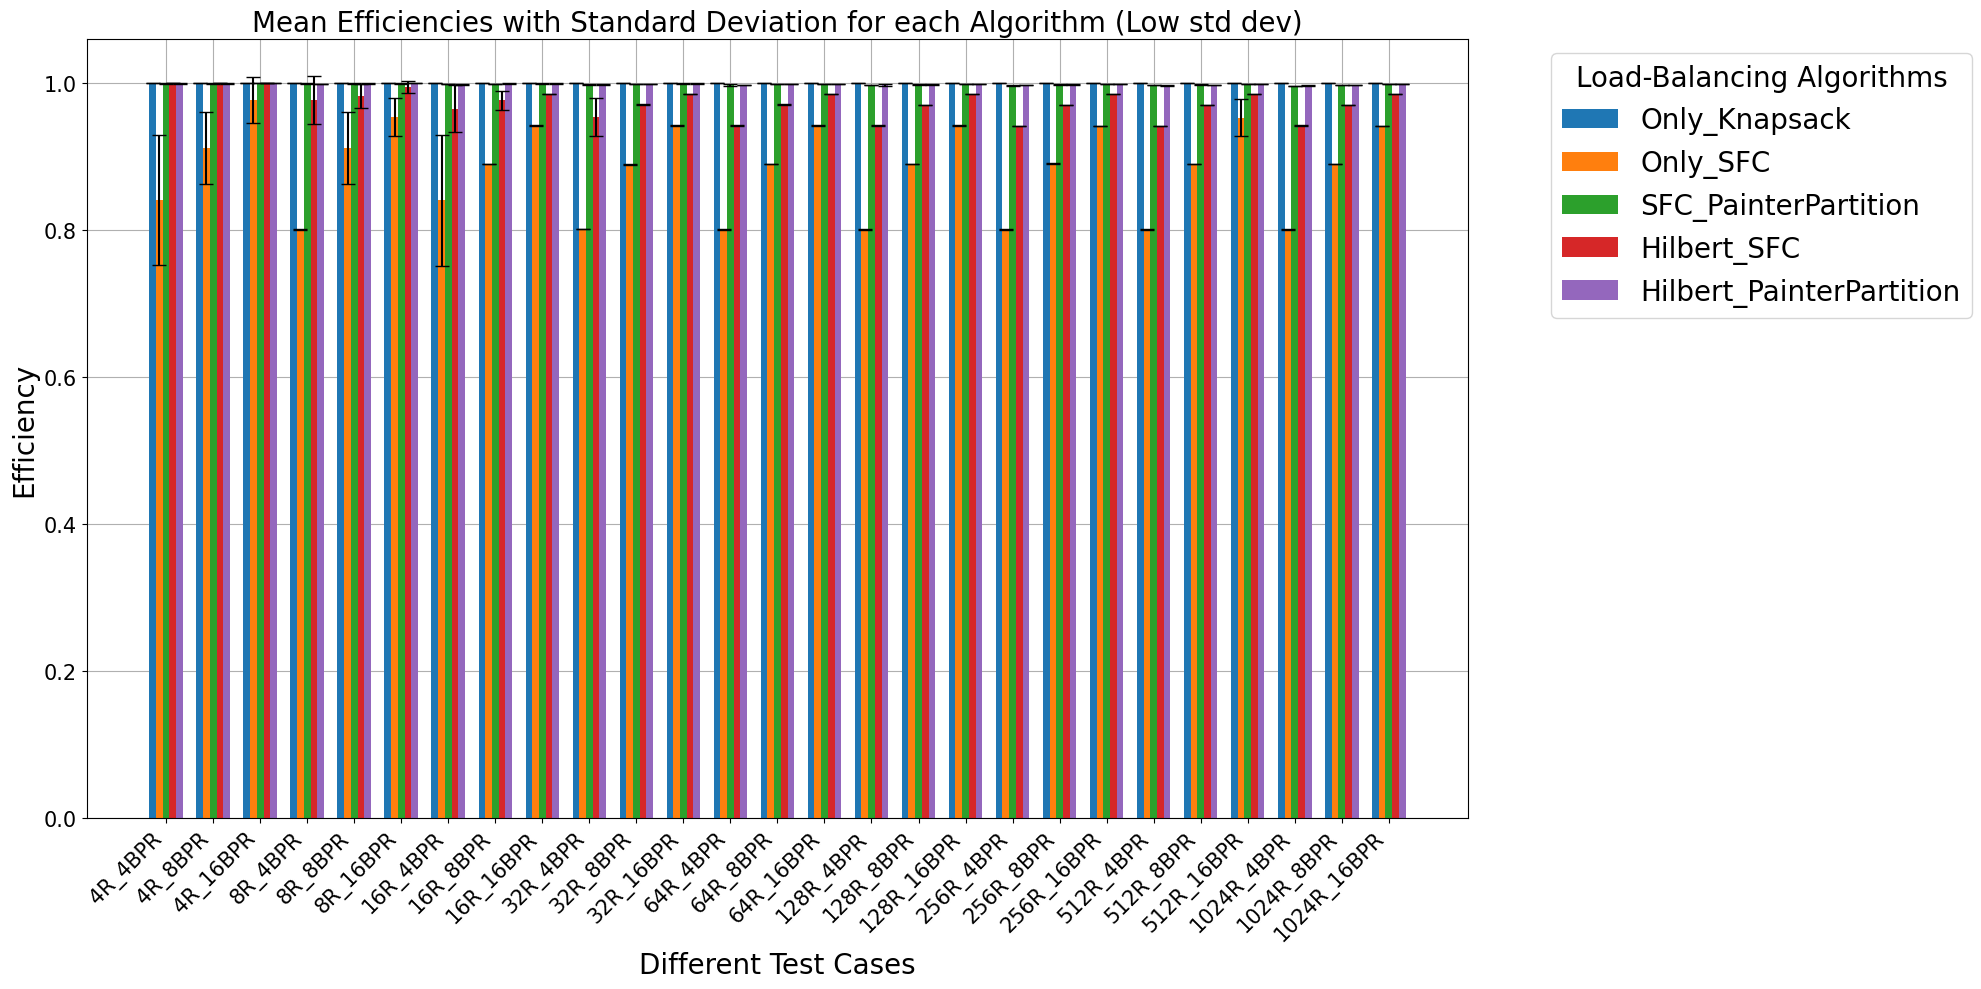

In [26]:
# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC', 'Hilbert_PainterPartition']
algorithms = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standard Deviation for each Algorithm (Low std dev)', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [27]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

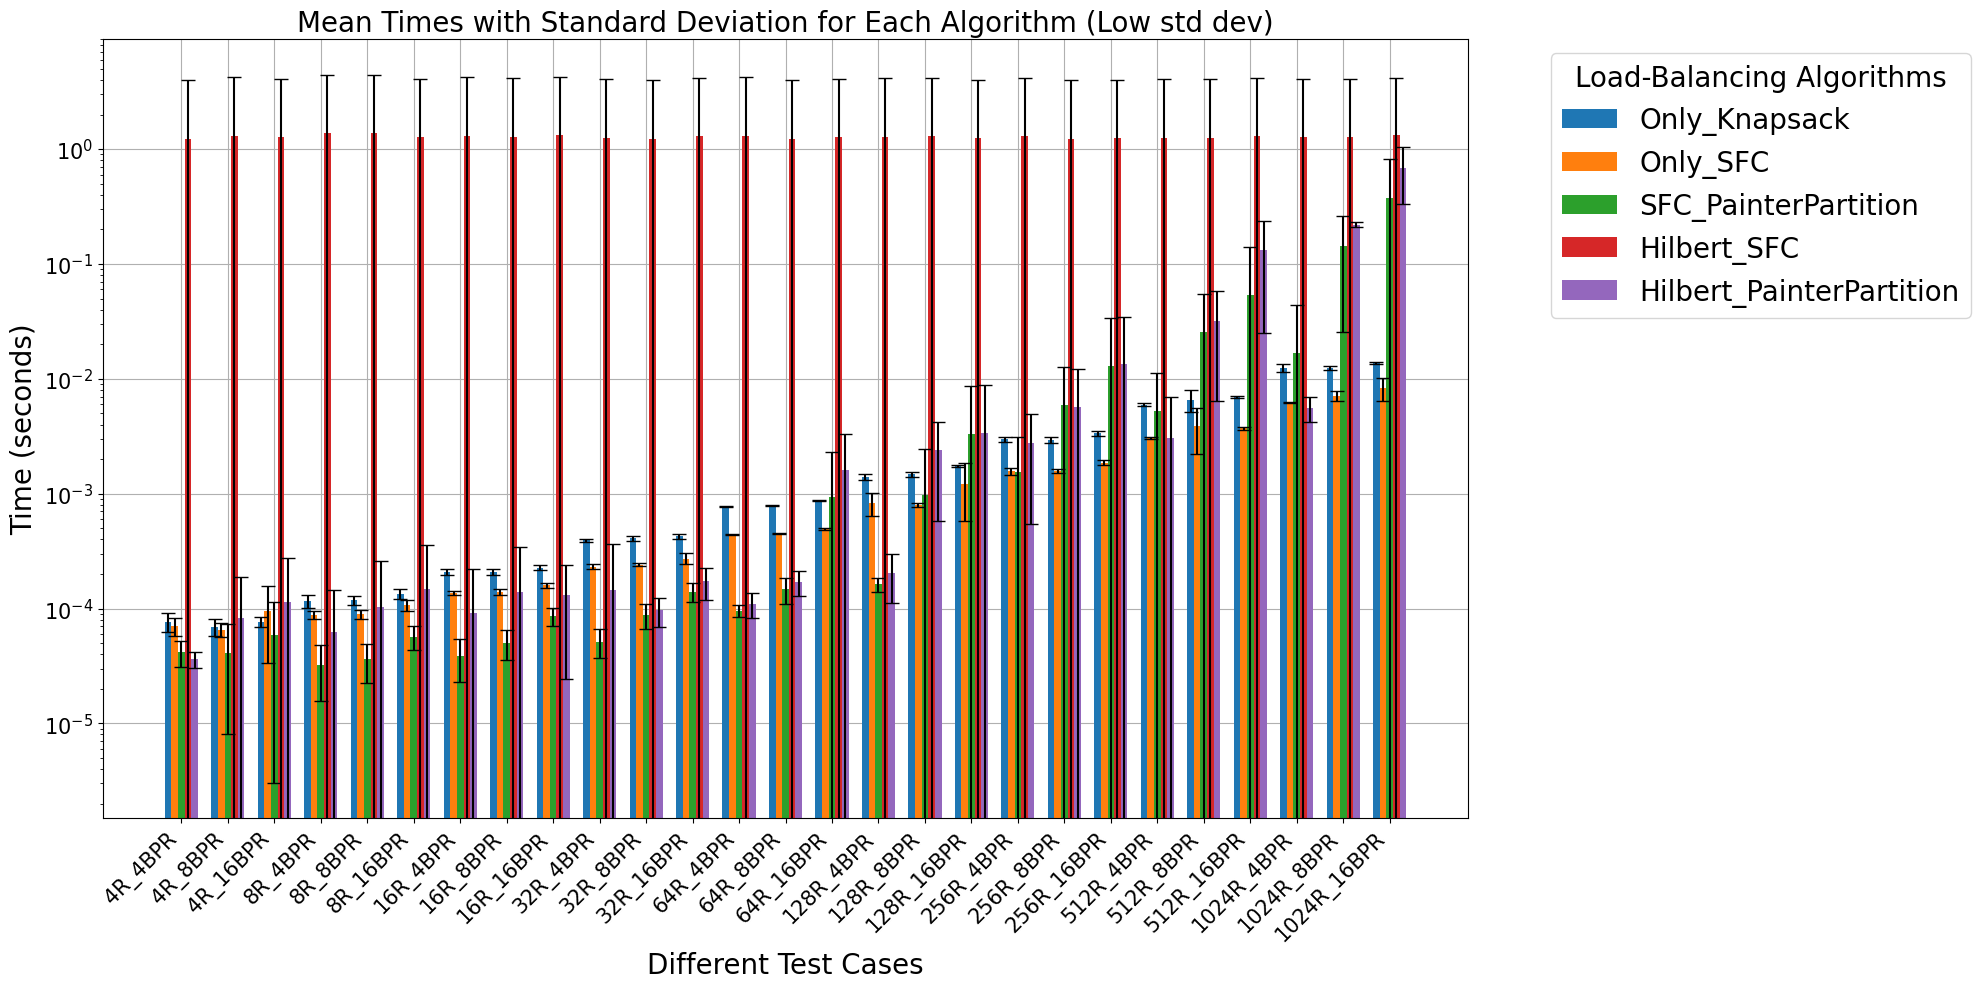

In [28]:

# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
time = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm (Low std dev)', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/time_errorbarplot.png', dpi=600)
plt.show()

In [29]:
# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC', 'Hilbert_PainterPartition']
algorithms = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']

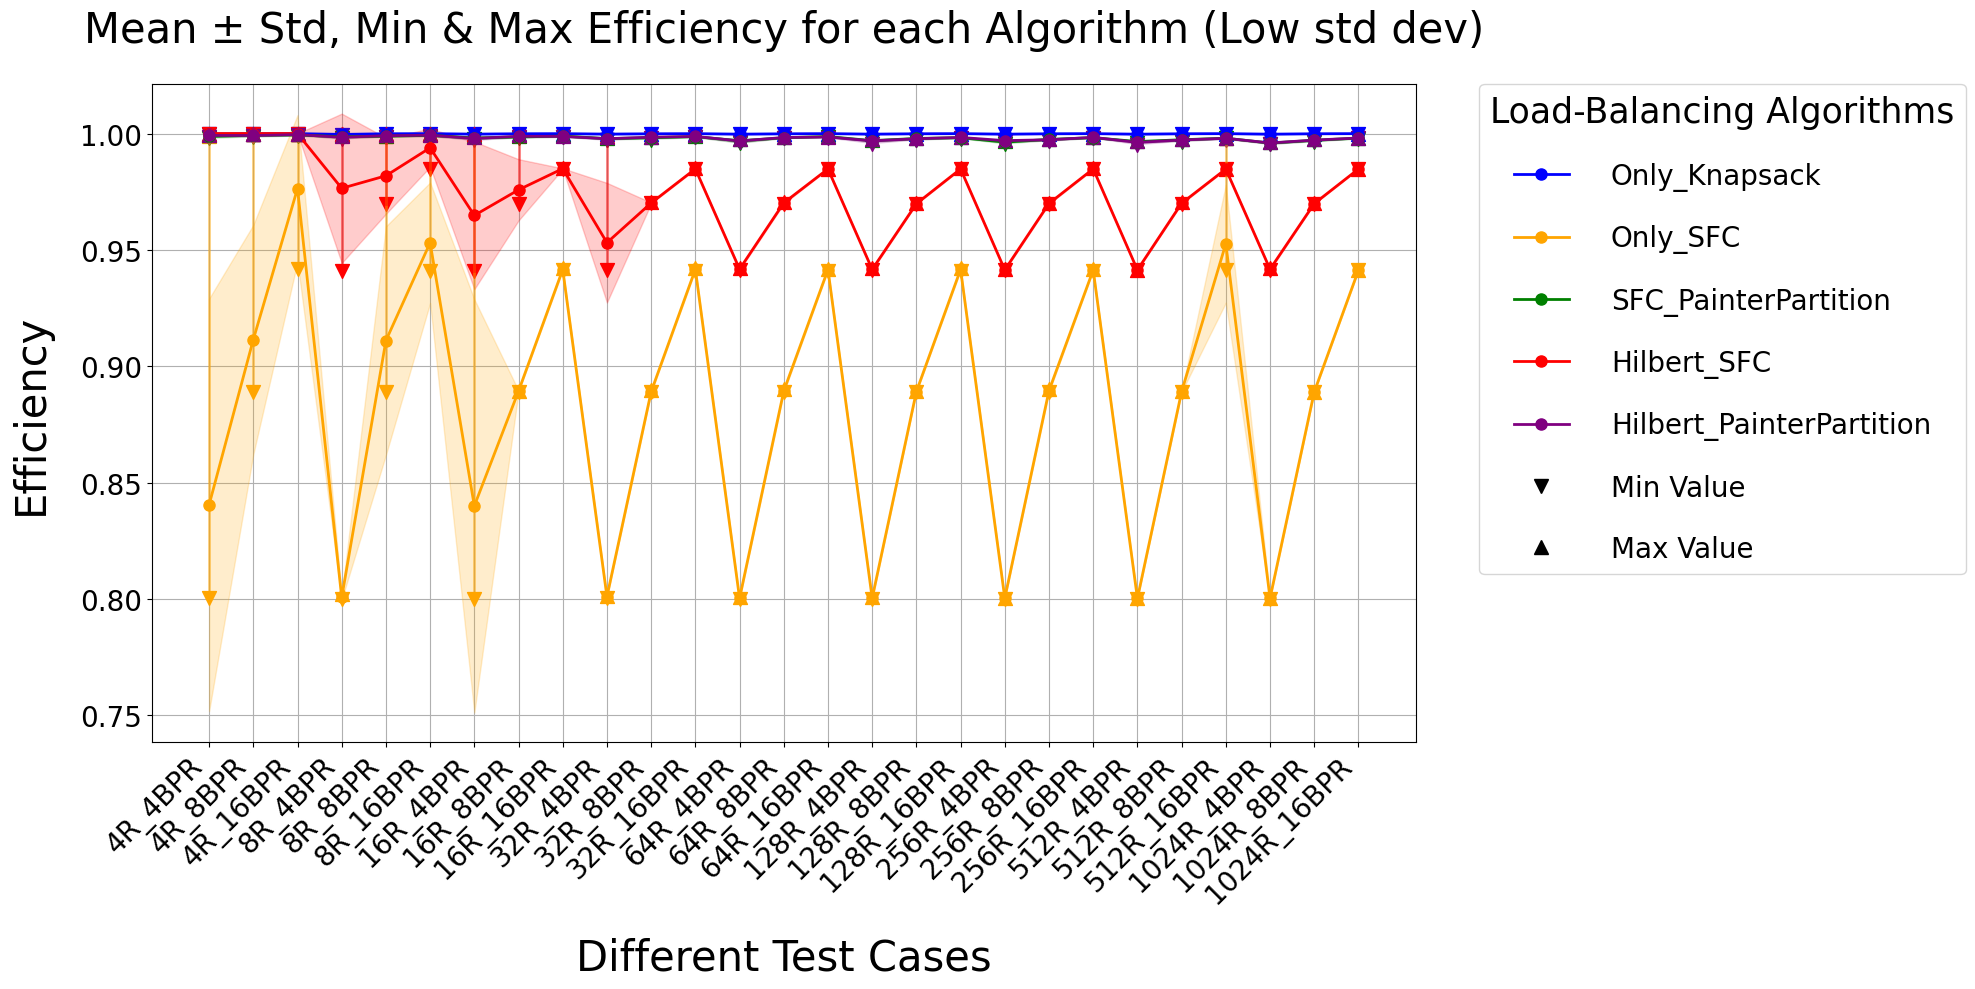

In [30]:

# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
algorithms = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm (Low std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency_all_stats.png', dpi=600)
plt.show()





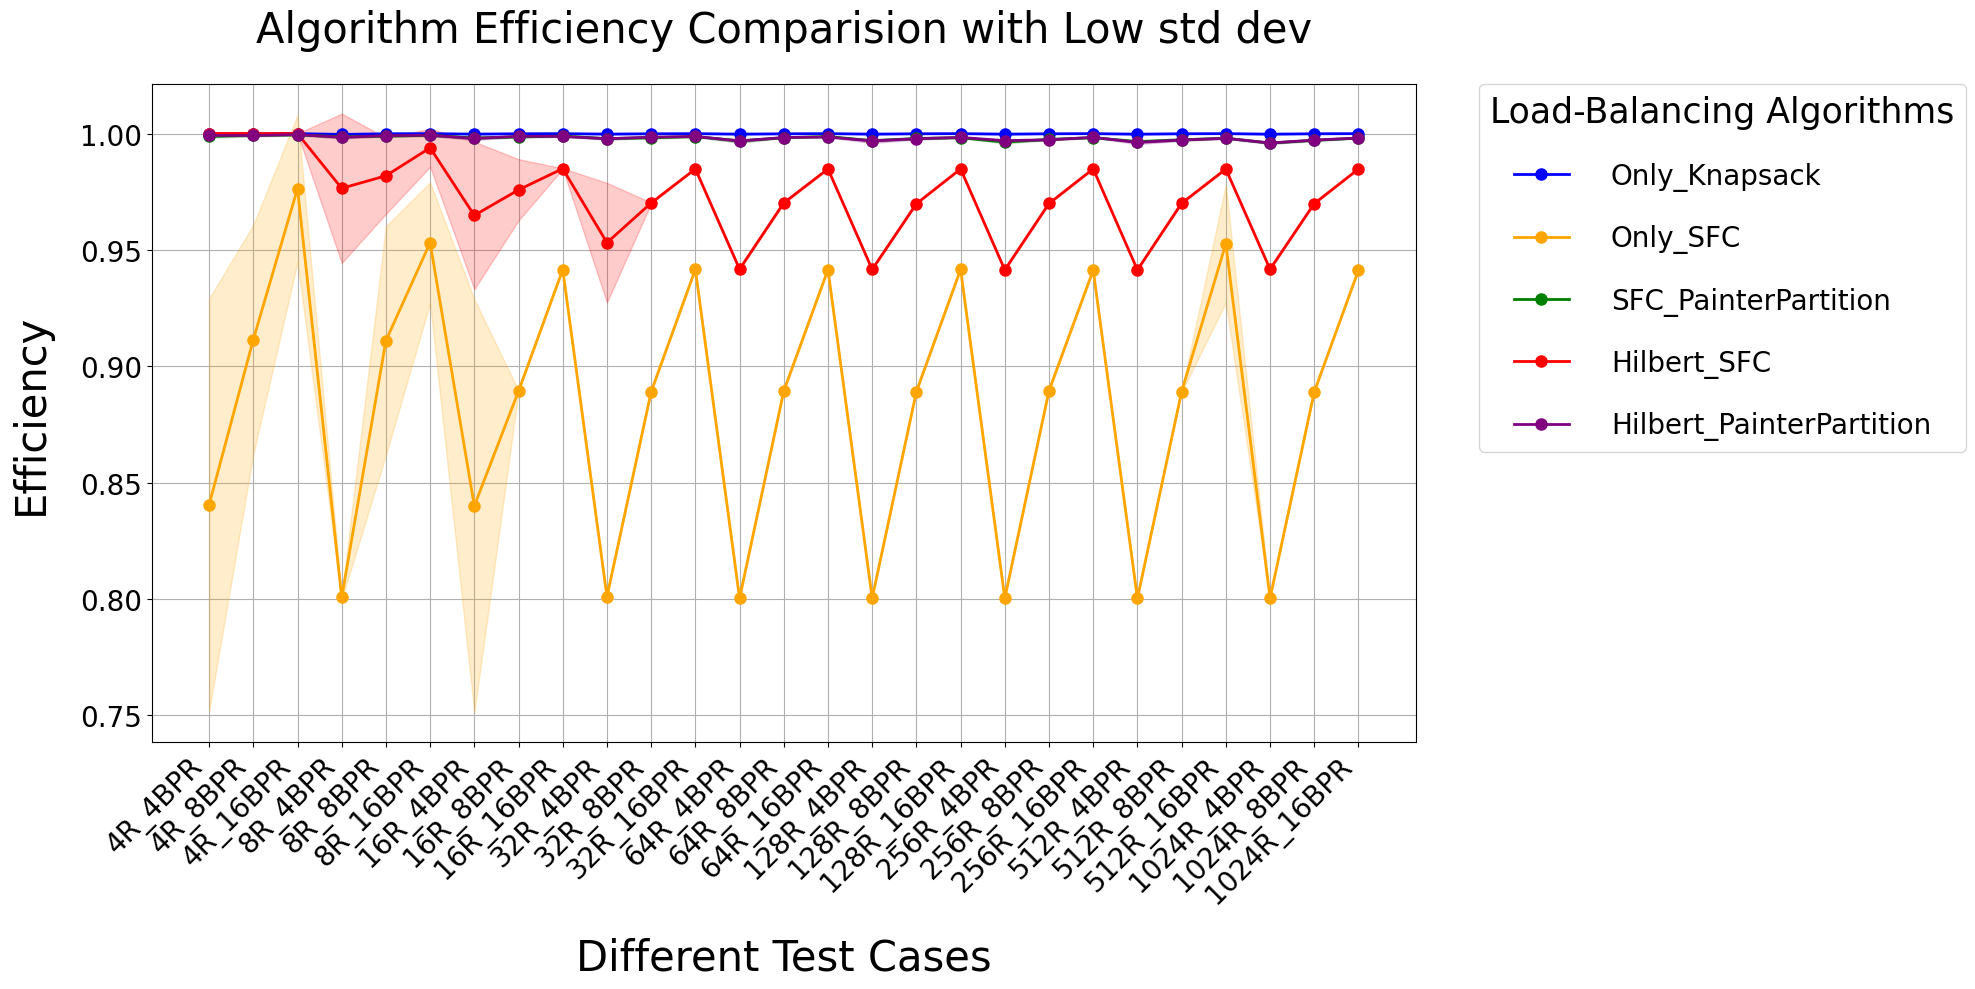

In [31]:
# algorithms = [
#     'Only_Knapsack', 
#     'SFC_PainterPartition', 
#     'Painter_Knapsack_Combined', 
#     'Only_SFC', 
#     'SFC_Knapsack_Combined',
#     'Hilbert_SFC'
# ]
algorithms = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Comparision with Low std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_best/efficiency_all_stats_nominmax.png', dpi=600)
plt.show()

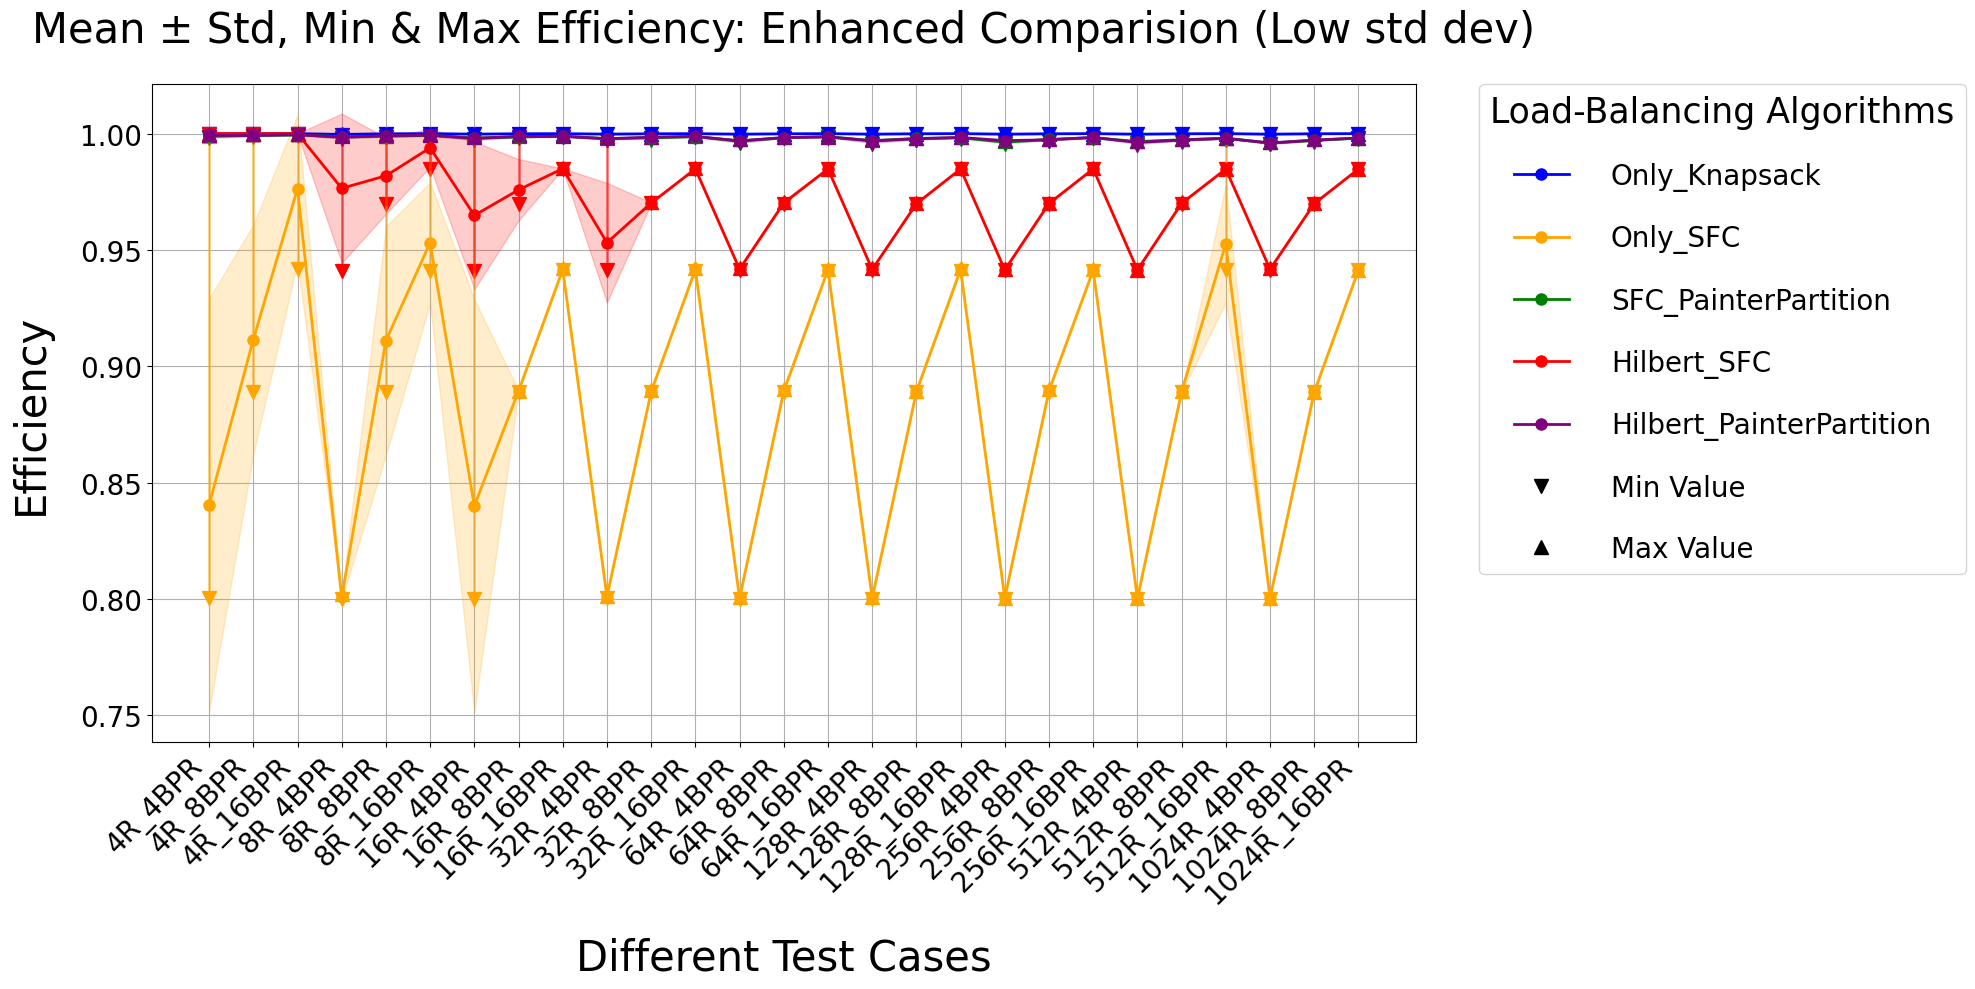

In [32]:


# algorithms = ['Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC', 'Hilbert_PainterPartition']
algorithms = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (Low std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency_all_stats_2.png', dpi=600)
plt.show()



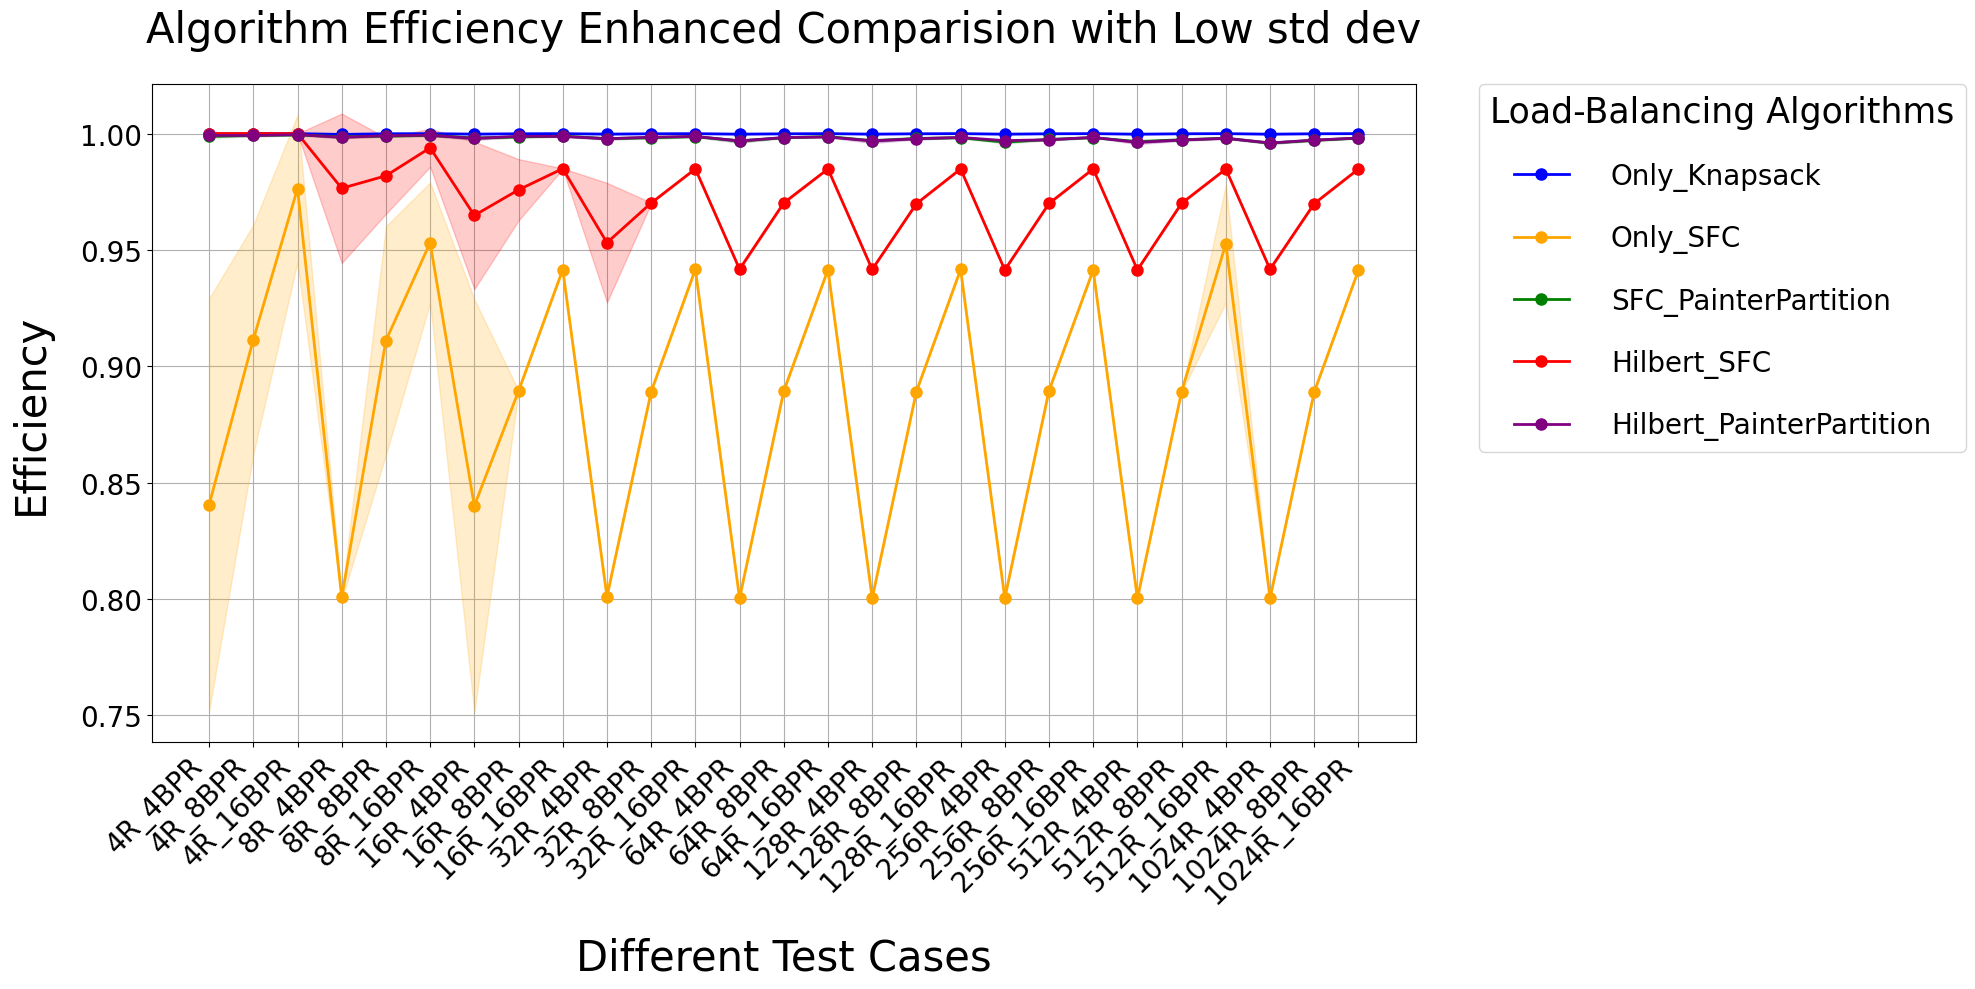

In [33]:
# algorithms = ['Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
# colors = ['red', 'purple', 'cyan']

algorithms = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with Low std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_best/efficiency_all_stats_2_nominmax.png', dpi=600)
plt.show()

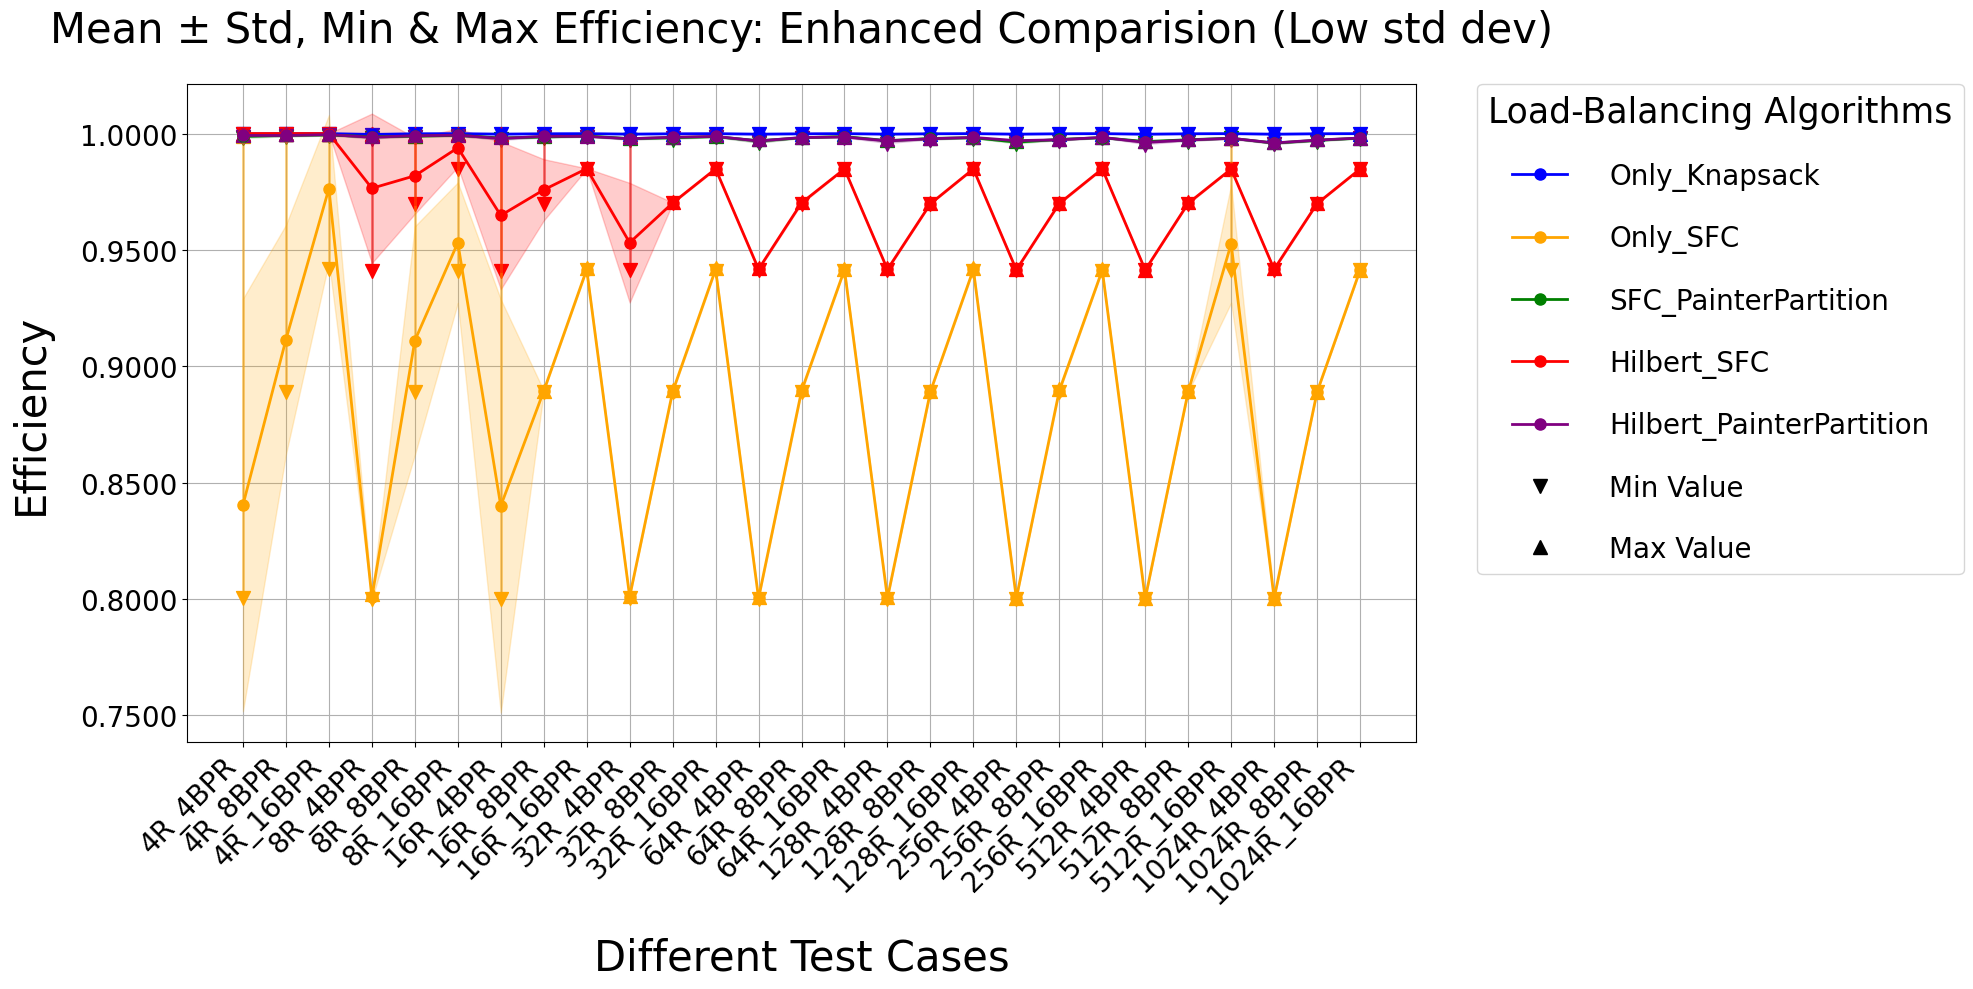

In [34]:
# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']


# algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined', 'Hilbert_SFC']
# colors = ['blue','orange', 'green', 'cyan']

algorithms = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (Low std dev)', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency_all_stats_3.png', dpi=600)
plt.show()


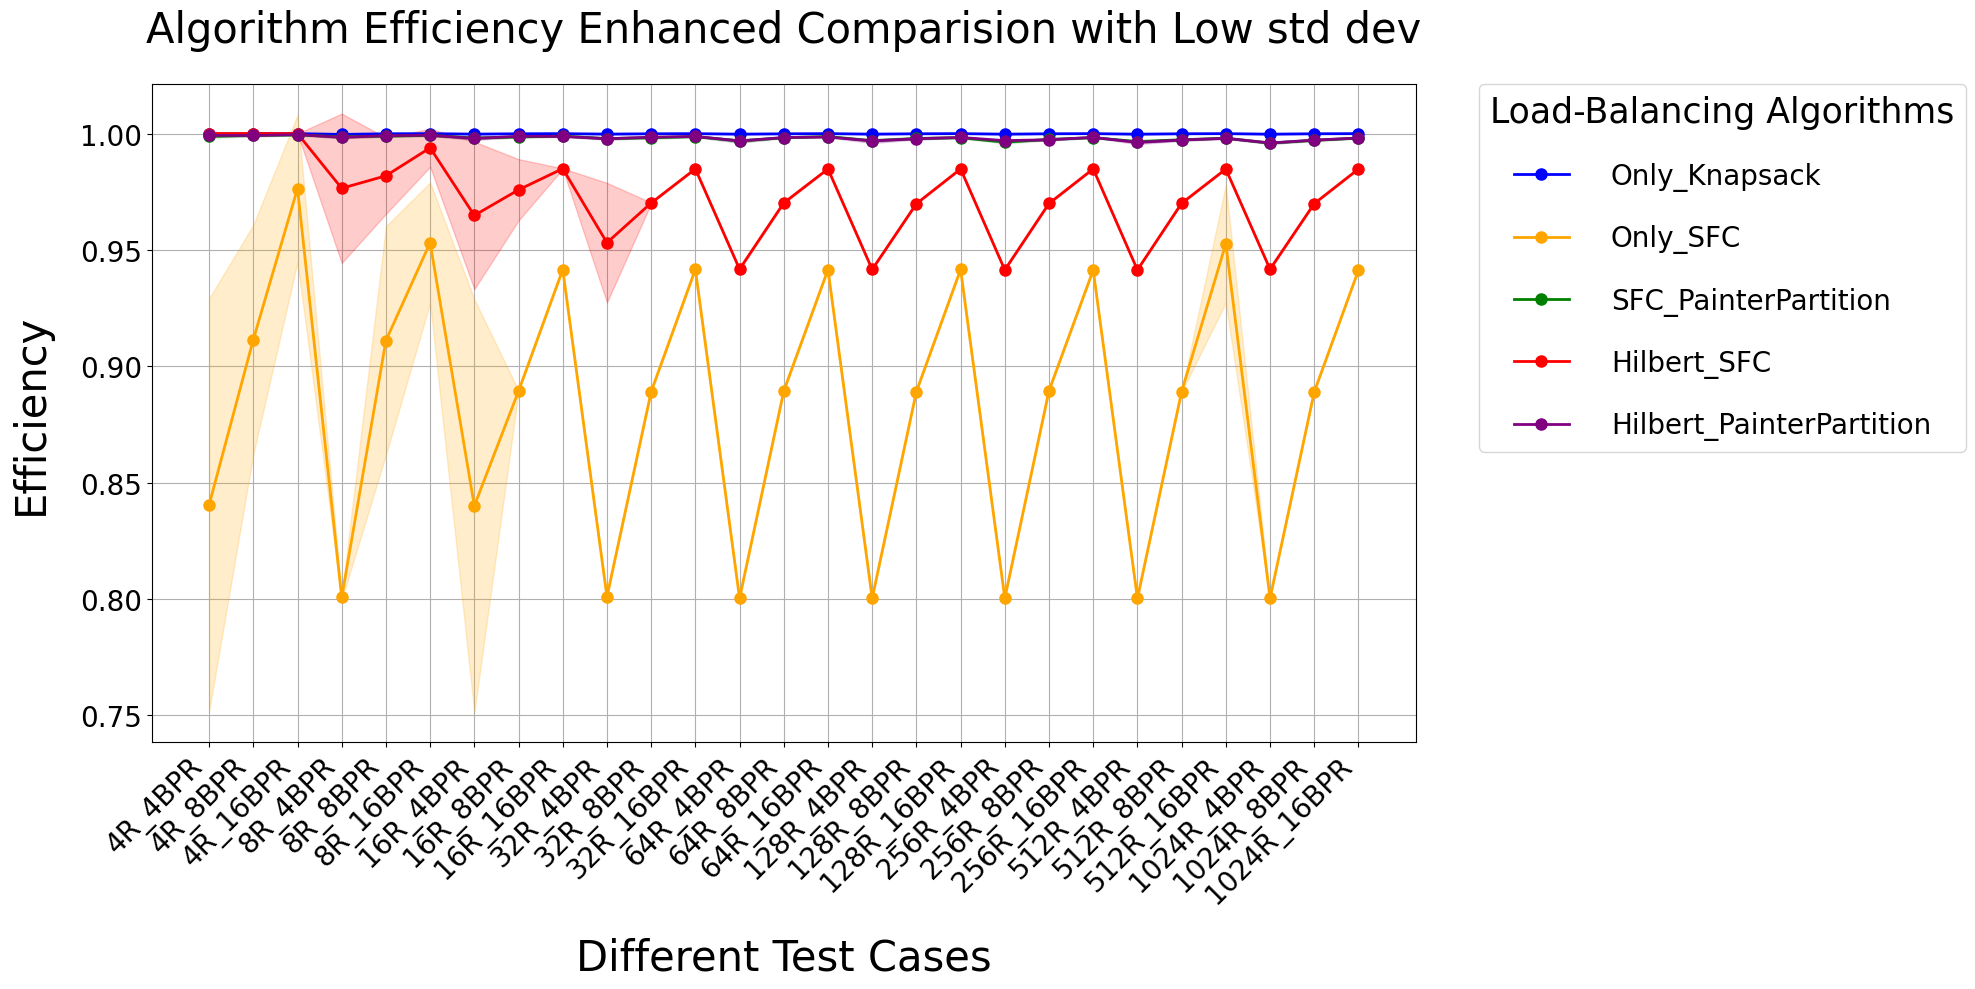

In [35]:

# algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined', 'Hilbert_SFC']
# colors = ['blue','orange', 'green', 'cyan']

algorithms = ['Only_Knapsack', 'Only_SFC', 'SFC_PainterPartition', 'Hilbert_SFC', 'Hilbert_PainterPartition']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with Low std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_best/efficiency_all_stats_3_nominmax.png', dpi=600)
plt.show()

In [36]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0       4R_4BPR                       0.999795                      0.000126   
1       4R_8BPR                       0.999903                      0.000044   
2      4R_16BPR                       0.999958                      0.000032   
3       8R_4BPR                       0.999620                      0.000169   
4       8R_8BPR                       0.999898                      0.000056   
5      8R_16BPR                       0.999948                      0.000020   
6      16R_4BPR                       0.999742                      0.000054   
7      16R_8BPR                       0.999896                      0.000048   
8     16R_16BPR                       0.999940                      0.000010   
9      32R_4BPR                       0.999748                      0.000030   
10     32R_8BPR                       0.999883                      0.000026   
11    32R_16BPR                       0.999943                      0.000010   
12     64R_4BPR                       0.999728                      0.000038   
13     64R_8BPR                       0.999876                      0.000011   
14    64R_16BPR                       0.999952                      0.000007   
15    128R_4BPR                       0.999735                      0.000034   
16    128R_8BPR                       0.999889                      0.000016   
17   128R_16BPR                       0.999952                      0.000003   
18    256R_4BPR                       0.999728                      0.000030   
19    256R_8BPR                       0.999890                      0.000012   
20   256R_16BPR                       0.999952                      0.000004   
21    512R_4BPR                       0.999715                      0.000022   
22    512R_8BPR                       0.999891                      0.000005   
23   512R_16BPR                       0.999952                      0.000003   
24   1024R_4BPR                       0.999718                      0.000011   
25   1024R_8BPR                       0.999894                      0.000002   
26  1024R_16BPR                       0.999953                      0.000002   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.999647                      0.999966   
1                       0.999845                      0.999961   
2                       0.999911                      0.999992   
3                       0.999391                      0.999844   
4                       0.999811                      0.999960   
5                       0.999929                      0.999981   
6                       0.999687                      0.999819   
7                       0.999827                      0.999933   
8                       0.999932                      0.999955   
9                       0.999724                      0.999801   
10                      0.999861                      0.999920   
11                      0.999933                      0.999956   
12                      0.999663                      0.999754   
13                      0.999859                      0.999888   
14                      0.999943                      0.999960   
15                      0.999683                      0.999778   
16                      0.999862                      0.999904   
17                      0.999949                      0.999956   
18                      0.999686                      0.999753   
19                      0.999871                      0.999898   
20                      0.999948                      0.999959   
21                      0.999681                      0.999738   
22                      0.999886                      0.999899   
23                      0.999949                      0.999957   
24                      0.999704                      0.999733   
25                      0.999890                      

In [37]:

# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     std_col = f'{alg_name}_Final_Time_std'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]
#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
#     upper_bound = grouped[mean_col] + grouped[std_col]

#     ax.fill_between(
#         x,
#         lower_bound,
#         upper_bound,
#         color=alg_color,
#         alpha=0.2
#     )
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]
#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
# ax.set_title('Mean ± Std, Min & Max Time for each Algorithm (Low std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_yscale('log')
# ax.set_ylim(1e-6, 0)  

# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats.png', dpi=600)
# plt.show()




In [38]:
# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]

#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]

#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases (R --> Ranks, BPR --> Boxes per Rank)', fontsize=30,labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
# ax.set_title('Mean, Min & Max Time for each Algorithm (Low std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_yscale('log')
# ax.set_ylim(1e-7, 0)  


# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats_2.png', dpi=600)
# plt.show()




In [39]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0       4R_4BPR                       0.999795                      0.000126   
1       4R_8BPR                       0.999903                      0.000044   
2      4R_16BPR                       0.999958                      0.000032   
3       8R_4BPR                       0.999620                      0.000169   
4       8R_8BPR                       0.999898                      0.000056   
5      8R_16BPR                       0.999948                      0.000020   
6      16R_4BPR                       0.999742                      0.000054   
7      16R_8BPR                       0.999896                      0.000048   
8     16R_16BPR                       0.999940                      0.000010   
9      32R_4BPR                       0.999748                      0.000030   
10     32R_8BPR                       0.999883                      0.000026   
11    32R_16BPR                       0.999943                      0.000010   
12     64R_4BPR                       0.999728                      0.000038   
13     64R_8BPR                       0.999876                      0.000011   
14    64R_16BPR                       0.999952                      0.000007   
15    128R_4BPR                       0.999735                      0.000034   
16    128R_8BPR                       0.999889                      0.000016   
17   128R_16BPR                       0.999952                      0.000003   
18    256R_4BPR                       0.999728                      0.000030   
19    256R_8BPR                       0.999890                      0.000012   
20   256R_16BPR                       0.999952                      0.000004   
21    512R_4BPR                       0.999715                      0.000022   
22    512R_8BPR                       0.999891                      0.000005   
23   512R_16BPR                       0.999952                      0.000003   
24   1024R_4BPR                       0.999718                      0.000011   
25   1024R_8BPR                       0.999894                      0.000002   
26  1024R_16BPR                       0.999953                      0.000002   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.999647                      0.999966   
1                       0.999845                      0.999961   
2                       0.999911                      0.999992   
3                       0.999391                      0.999844   
4                       0.999811                      0.999960   
5                       0.999929                      0.999981   
6                       0.999687                      0.999819   
7                       0.999827                      0.999933   
8                       0.999932                      0.999955   
9                       0.999724                      0.999801   
10                      0.999861                      0.999920   
11                      0.999933                      0.999956   
12                      0.999663                      0.999754   
13                      0.999859                      0.999888   
14                      0.999943                      0.999960   
15                      0.999683                      0.999778   
16                      0.999862                      0.999904   
17                      0.999949                      0.999956   
18                      0.999686                      0.999753   
19                      0.999871                      0.999898   
20                      0.999948                      0.999959   
21                      0.999681                      0.999738   
22                      0.999886                      0.999899   
23                      0.999949                      0.999957   
24                      0.999704                      0.999733   
25                      0.999890                      

In [40]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'Painter_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'Painter_Knapsack_Combined_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'Hilbert_SFC_Final_Time_mean', 'Hilbert_SFC_Efficiency_mean', 'Hilbert_PainterPartition_Final_Time_mean', 'Hilbert_PainterPartition_Efficiency_mean']
new_df = grouped[columns_to_keep]


In [41]:
new_df

File  Only_Knapsack_Efficiency_mean  Only_SFC_Efficiency_mean  \
0       4R_4BPR                       0.999795                  0.840464   
1       4R_8BPR                       0.999903                  0.911468   
2      4R_16BPR                       0.999958                  0.976357   
3       8R_4BPR                       0.999620                  0.800667   
4       8R_8BPR                       0.999898                  0.911032   
5      8R_16BPR                       0.999948                  0.953078   
6      16R_4BPR                       0.999742                  0.840018   
7      16R_8BPR                       0.999896                  0.889330   
8     16R_16BPR                       0.999940                  0.941571   
9      32R_4BPR                       0.999748                  0.801023   
10     32R_8BPR                       0.999883                  0.889072   
11    32R_16BPR                       0.999943                  0.941655   
12     64R_4BPR                       0.999728                  0.800328   
13     64R_8BPR                       0.999876                  0.889372   
14    64R_16BPR                       0.999952                  0.941523   
15    128R_4BPR                       0.999735                  0.800368   
16    128R_8BPR                       0.999889                  0.889121   
17   128R_16BPR                       0.999952                  0.941599   
18    256R_4BPR                       0.999728                  0.800378   
19    256R_8BPR                       0.999890                  0.889532   
20   256R_16BPR                       0.999952                  0.941342   
21    512R_4BPR                       0.999715                  0.800261   
22    512R_8BPR                       0.999891                  0.889105   
23   512R_16BPR                       0.999952                  0.952655   
24   1024R_4BPR                       0.999718                  0.800344   
25   1024R_8BPR                       0.999894                  0.888959   
26  1024R_16BPR                       0.999953                  0.941259   

    SFC_PainterPartition_Efficiency_mean  \
0                               0.998752   
1                               0.999237   
2                               0.999384   
3                               0.998631   
4                               0.998852   
5                               0.999215   
6                               0.998087   
7                               0.998514   
8                               0.998916   
9                               0.997812   
10                              0.998191   
11                              0.998684   
12                              0.996823   
13                              0.998175   
14                              0.998713   
15                              0.996907   
16                              0.997887   
17                              0.998216   
18                              0.996297   
19                              0.997476   
20                              0.998219   
21                              0.996546   
22                              0.997322   
23                              0.997995   
24                              0.995884   
25                              0.997084   
26                              0.998032   

    Painter_Knapsack_Combined_Efficiency_mean  \
0                                    0.999795   
1                                    0.999903   
2                                    0.999958   
3                                    0.999421   
4                                    0.999648   
5                                    0.999772   
6                                    0.999208   
7                                    0.999528   
8                                    0.999657   
9                                    0.998984   
10                                   0.999387   
11                                   0.999550   
12          

In [42]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

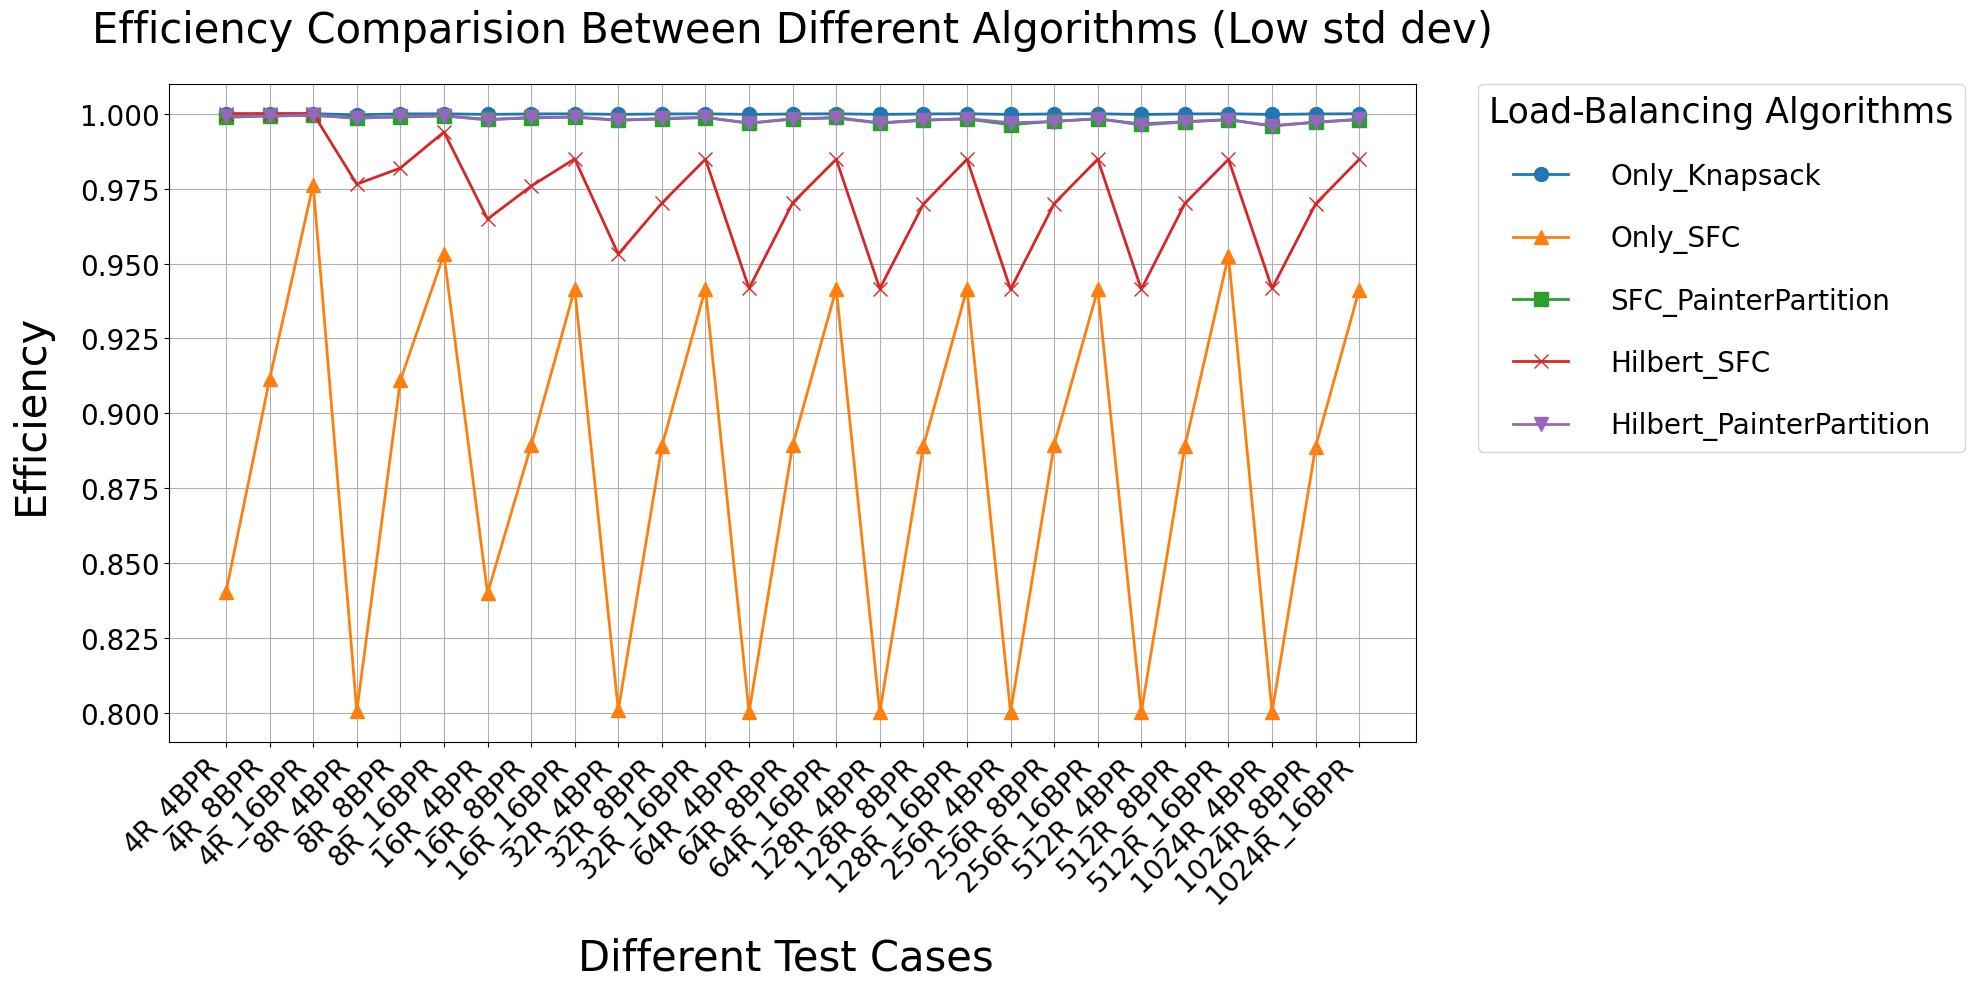

In [43]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    # ('Painter_Knapsack_Combined', 'Painter_Knapsack_Combined_Efficiency_mean', 'Painter_Knapsack_Combined_Final_Time_mean', '*'),
    # ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D'),
    ('Hilbert_SFC', 'Hilbert_SFC_Efficiency_mean', 'Hilbert_SFC_Final_Time_mean', 'x'),
    ('Hilbert_PainterPartition', 'Hilbert_PainterPartition_Efficiency_mean', 'Hilbert_PainterPartition_Final_Time_mean', 'v')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases ', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms (Low std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency.png', dpi=600)
plt.show()





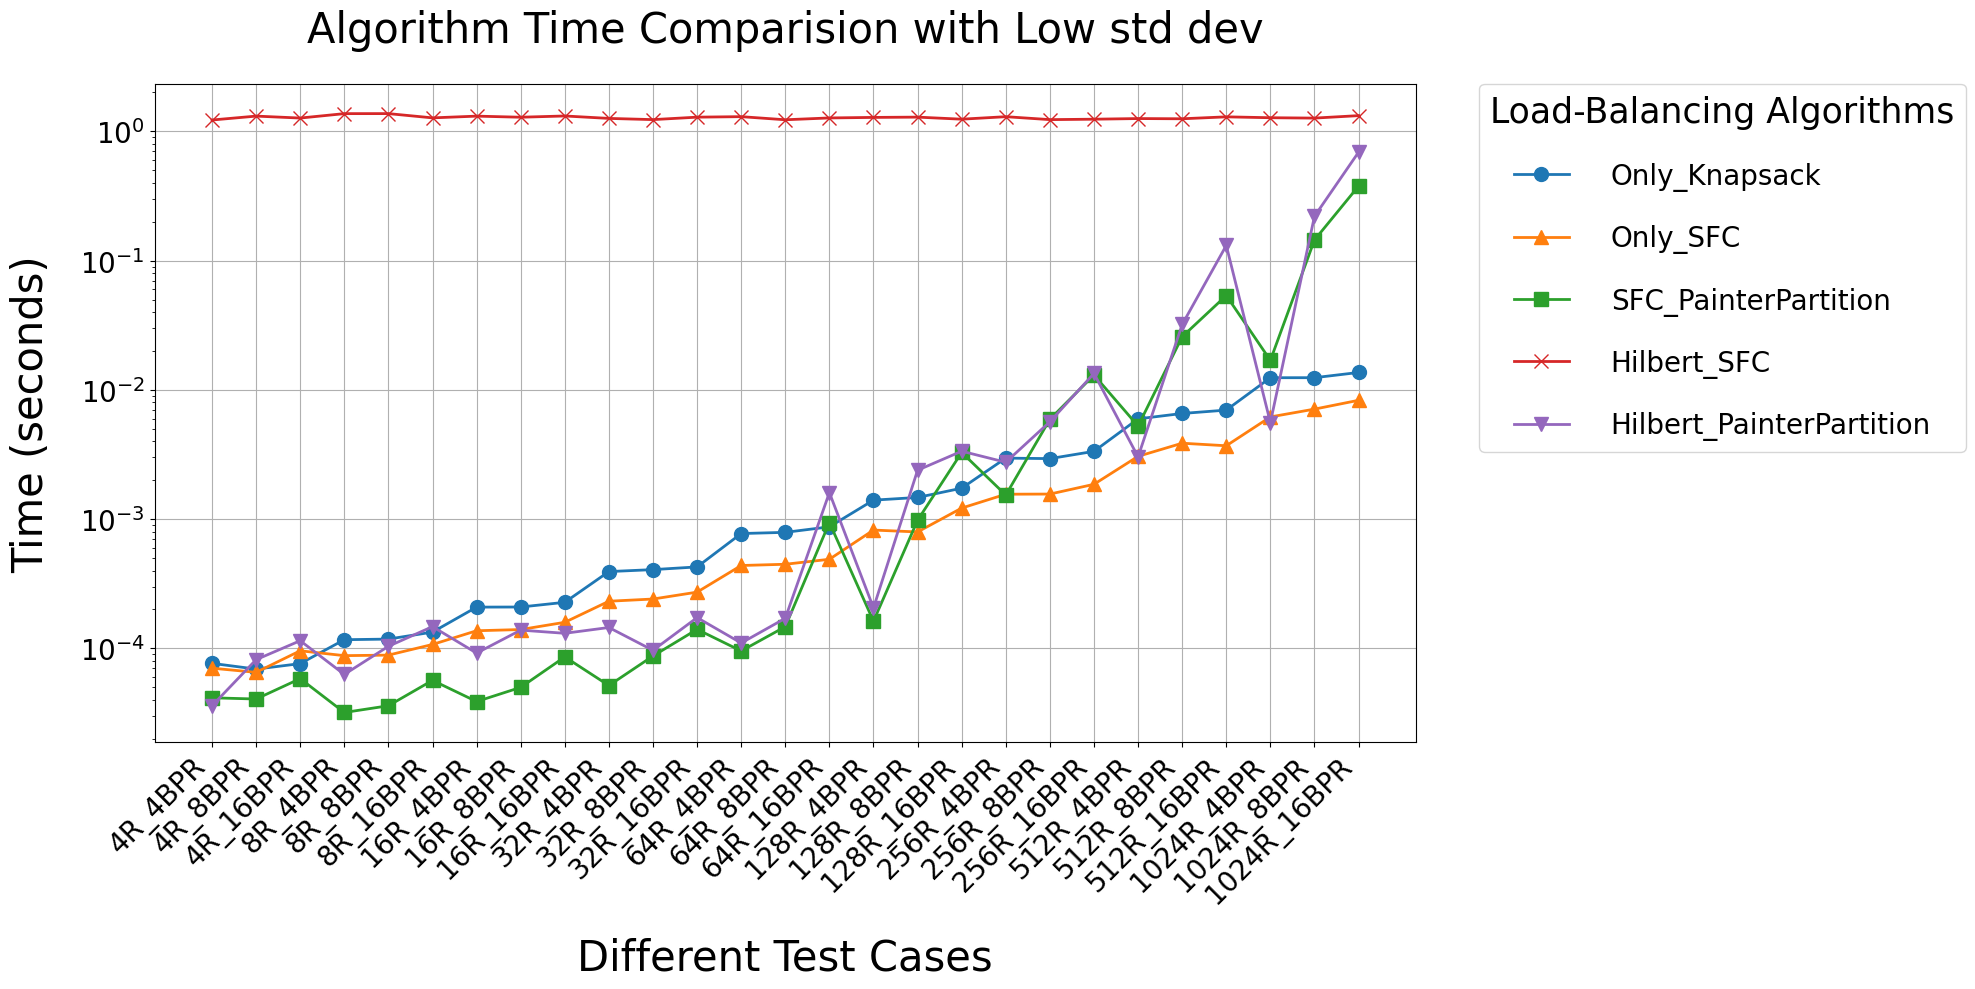

In [44]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Algorithm Time Comparision with Low std dev', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)


ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('../result/result_best/time.png', dpi=600)
plt.show()




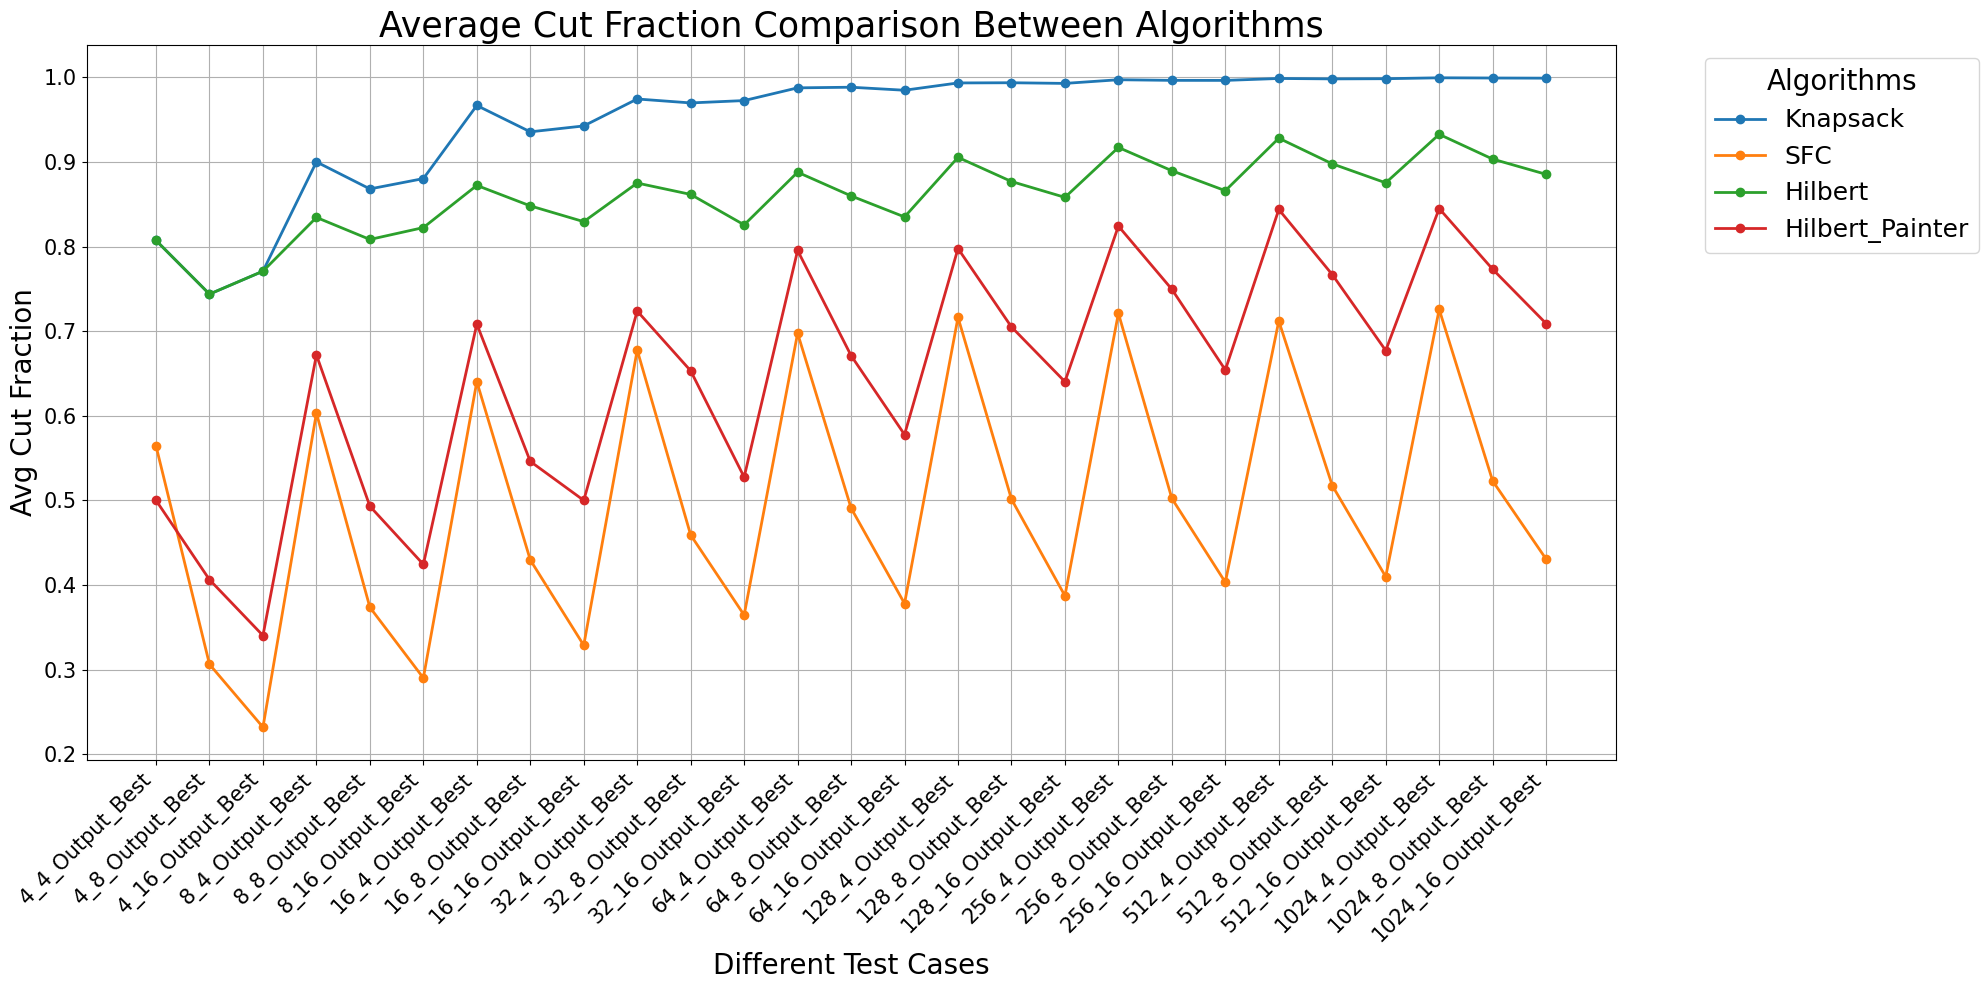

In [45]:
# Extract averaged cut fractions from output files and plot them

def extract_avg_cut_fractions(file_list):
    cut_fraction_patterns = {
        'Knapsack': r'Knapsack - Avg Efficiency: [\d.]+, Avg Cut Fraction: ([\d.]+)',
        'SFC': r'SFC - Avg Efficiency: [\d.]+, Avg Cut Fraction: ([\d.]+)',
        'Hilbert': r'Hilbert - Avg Efficiency: [\d.]+, Avg Cut Fraction: ([\d.]+)',
        'Hilbert_Painter': r'Hilbert \+ Painter - Avg Efficiency: [\d.]+, Avg Cut Fraction: ([\d.]+)'
    }
    data = []
    for file_path in file_list:
        with open(file_path, 'r') as f:
            content = f.read()
        row = {'File': os.path.splitext(os.path.basename(file_path))[0]}
        for key, pattern in cut_fraction_patterns.items():
            match = re.search(pattern, content)
            row[key] = float(match.group(1)) if match else None
        data.append(row)
    return pd.DataFrame(data)

cut_fraction_df = extract_avg_cut_fractions(file_paths)
cut_fraction_df['File'] = cut_fraction_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

algorithms_cf = ['Knapsack', 'SFC', 'Hilbert', 'Hilbert_Painter']
x_cf = np.arange(len(cut_fraction_df['File']))

fig, ax = plt.subplots(figsize=(20, 10))
for alg in algorithms_cf:
    ax.plot(x_cf, cut_fraction_df[alg], marker='o', linewidth=2, label=alg)
ax.set_xticks(x_cf)
ax.set_xticklabels(cut_fraction_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Avg Cut Fraction', fontsize=20)
ax.set_title('Average Cut Fraction Comparison Between Algorithms', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Algorithms', title_fontsize=20, fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

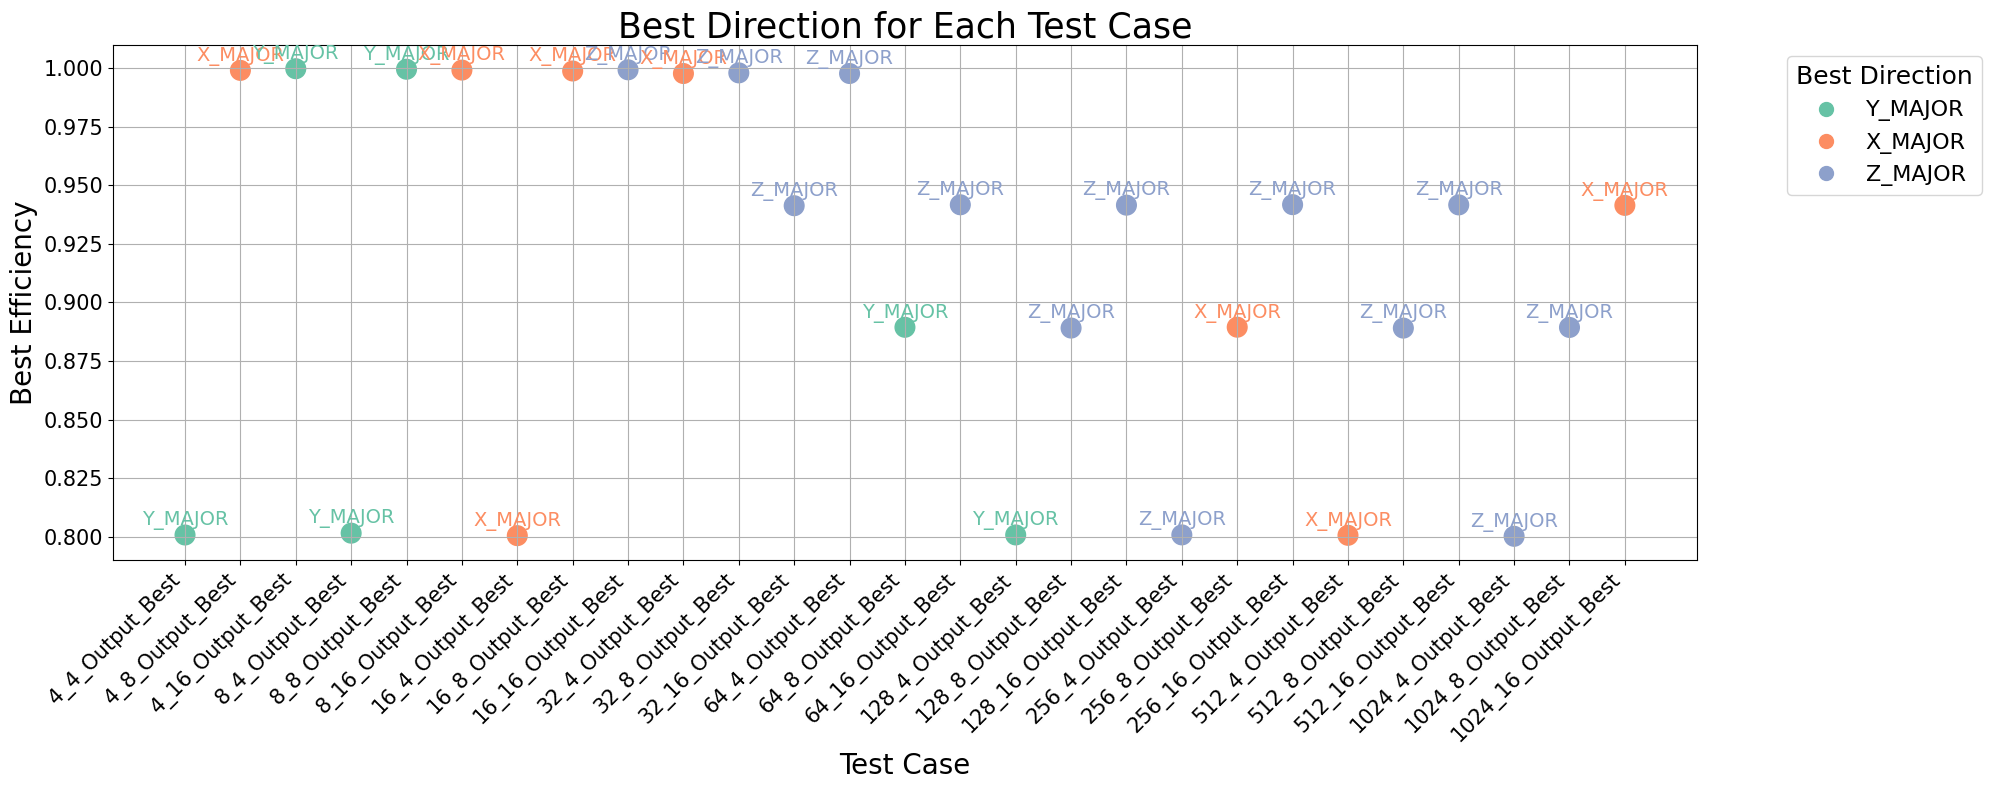

In [55]:
# rename DEFAULT to X_MAJOR for consistency
best_dir_df['Best_Direction'] = best_dir_df['Best_Direction'].replace({'DEFAULT': 'X_MAJOR'})

unique_dirs = best_dir_df['Best_Direction'].unique()
colors = dict(zip(unique_dirs, sns.color_palette('Set2', len(unique_dirs))))
x_dir = np.arange(len(best_dir_df['File']))

fig, ax = plt.subplots(figsize=(20, 8))
scatter = ax.scatter(
    x_dir, best_dir_df['Best_Efficiency'],
    c=best_dir_df['Best_Direction'].map(colors),
    s=200
)

for i, direction in enumerate(best_dir_df['Best_Direction']):
    ax.text(x_dir[i], best_dir_df['Best_Efficiency'][i]+0.002, direction, 
            ha='center', va='bottom', fontsize=14, color=colors.get(direction, 'black'))

ax.set_xticks(x_dir)
ax.set_xticklabels(best_dir_df['File'], rotation=45, ha='right')
ax.set_xlabel('Test Case', fontsize=20)
ax.set_ylabel('Best Efficiency', fontsize=20)
ax.set_title('Best Direction for Each Test Case', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)

legend_handles = [mlines.Line2D([], [], color=clr, marker='o', linestyle='None', markersize=10, label=dir) for dir, clr in colors.items()]
ax.legend(handles=legend_handles, title='Best Direction', title_fontsize=18, fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_481342/2598029303.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(cmap_name)(t)


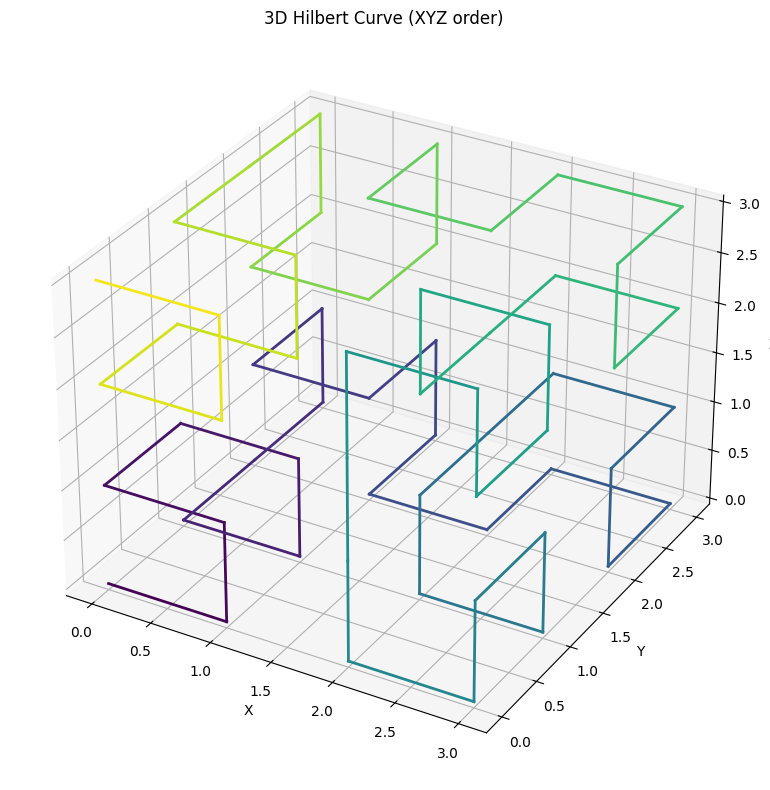

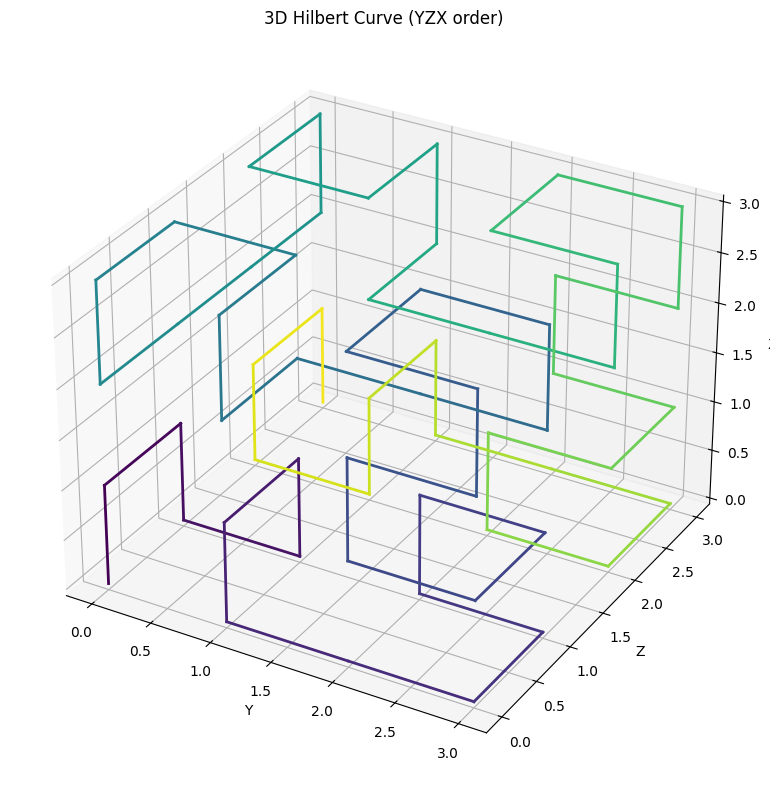

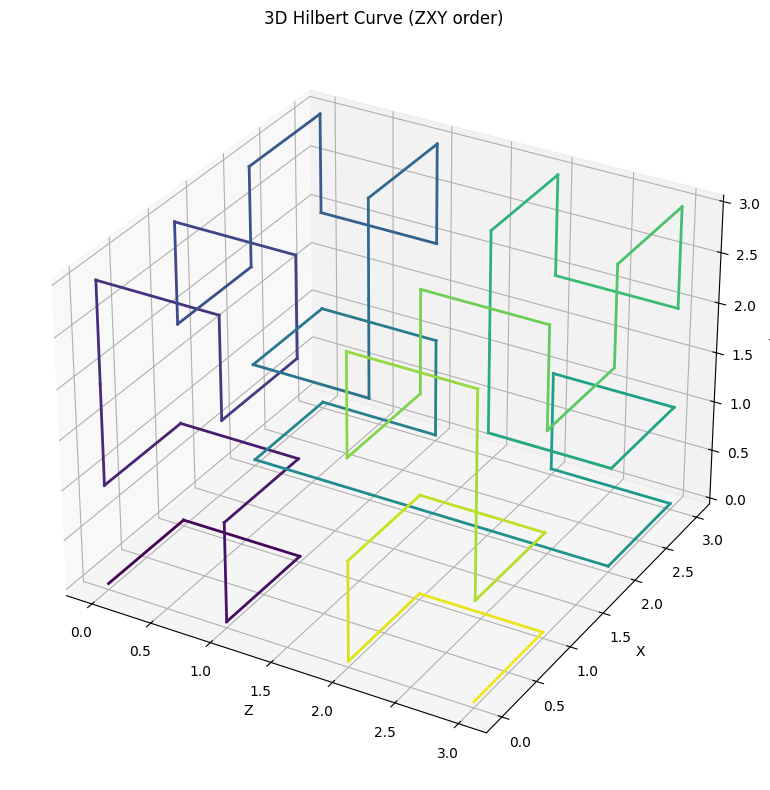

In [5]:
from hilbertcurve.hilbertcurve import HilbertCurve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

def plot_hilbert_3d(order=3, axis_order='XYZ', cmap_name='viridis'):
    p = order
    n = 3
    hilbert_curve = HilbertCurve(p, n)
    num_points = 2 ** (p * n // n)
    points = [hilbert_curve.point_from_distance(i) for i in range(num_points)]
    points = np.array(points)
    
    axis_map = {'X': 0, 'Y': 1, 'Z': 2}
    idx = [axis_map[c] for c in axis_order]
    points = points[:, idx]
    
    # Normalize indices for colormap
    t = np.linspace(0, 1, num_points)
    colors = cm.get_cmap(cmap_name)(t)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot with color gradient
    for i in range(num_points - 1):
        ax.plot(
            points[i:i+2, 0], points[i:i+2, 1], points[i:i+2, 2],
            color=colors[i], linewidth=2
        )
    ax.set_title(f'3D Hilbert Curve ({axis_order} order)')
    ax.set_xlabel(f'{axis_order[0]}')
    ax.set_ylabel(f'{axis_order[1]}')
    ax.set_zlabel(f'{axis_order[2]}')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_hilbert_3d(order=6, axis_order='XYZ')
plot_hilbert_3d(order=6, axis_order='YZX')
plot_hilbert_3d(order=6, axis_order='ZXY')


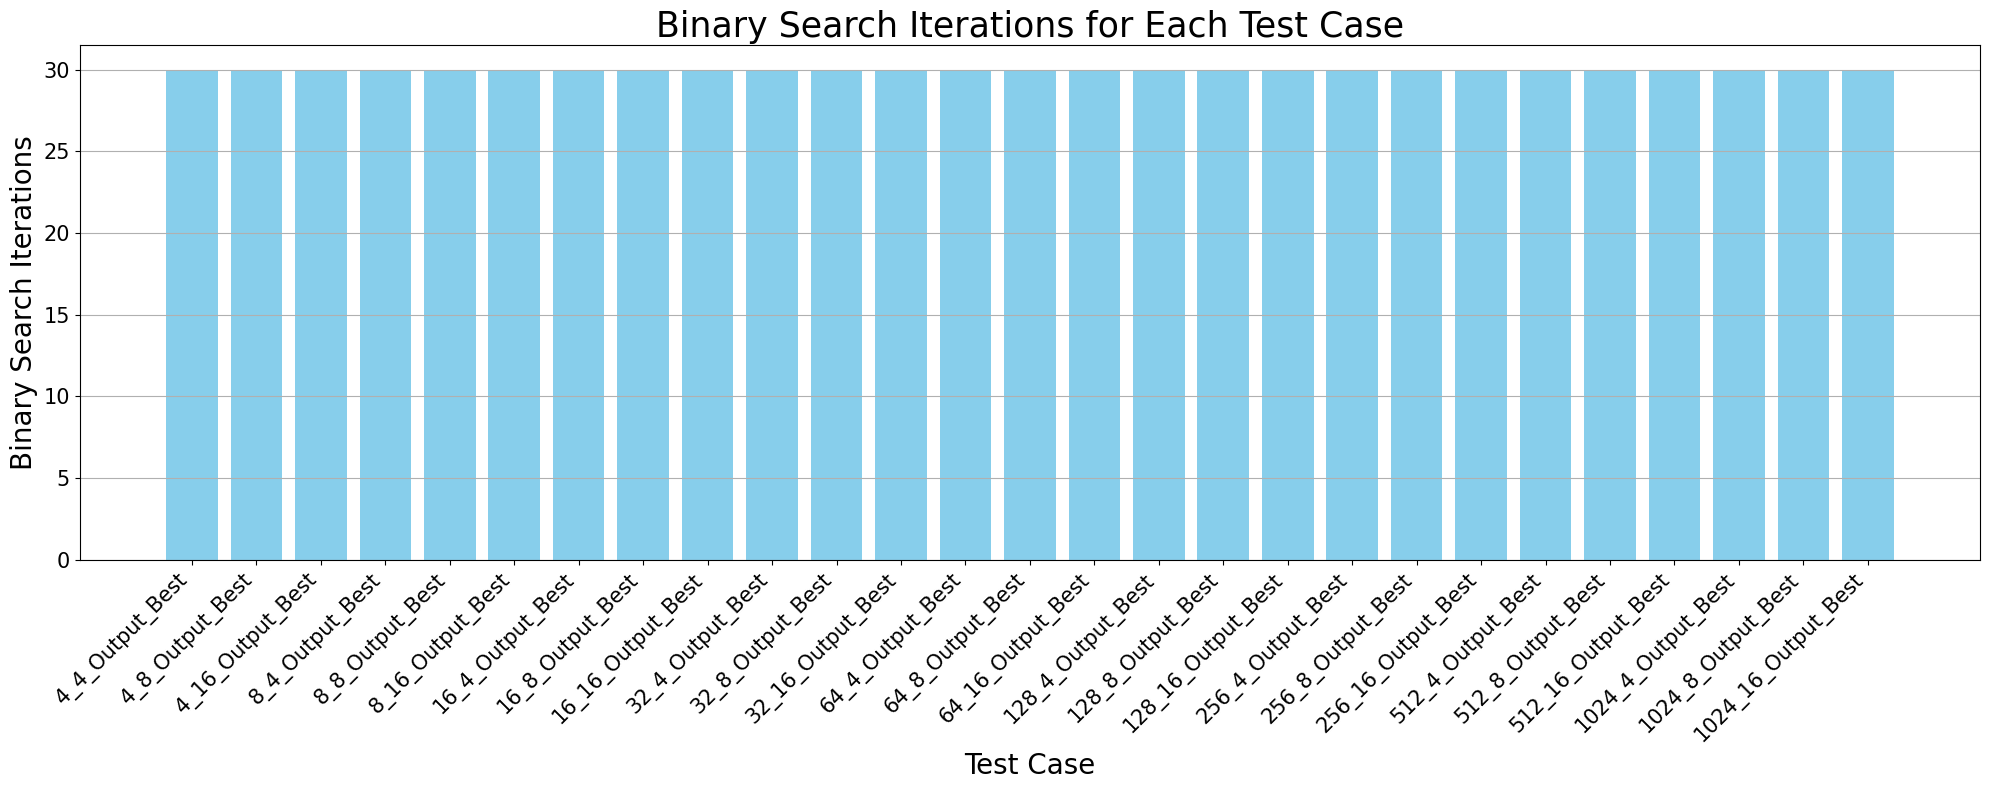

In [57]:
# Extract and plot the number of binary search iterations for each file

def extract_binary_search_iterations(file_list):
    pattern = r"Binary search iterations:\s+(\d+)"
    data = []
    for file_path in file_list:
        with open(file_path, 'r') as f:
            content = f.read()
        match = re.search(pattern, content)
        iterations = int(match.group(1)) if match else None
        row = {'File': os.path.splitext(os.path.basename(file_path))[0], 'Iterations': iterations}
        data.append(row)
    return pd.DataFrame(data)

iterations_df = extract_binary_search_iterations(file_paths)
iterations_df['File'] = iterations_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

x_iter = np.arange(len(iterations_df['File']))

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(x_iter, iterations_df['Iterations'], color='skyblue')
ax.set_xticks(x_iter)
ax.set_xticklabels(iterations_df['File'], rotation=45, ha='right')
ax.set_xlabel('Test Case', fontsize=20)
ax.set_ylabel('Binary Search Iterations', fontsize=20)
ax.set_title('Binary Search Iterations for Each Test Case', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()